# Best model found so far!
This notebook contains the best model compared to previous ones by comparing its performance with a linear model

In [5]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' # disable info log from tensorflow

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

import tensorflow as tf
from modules.DatasetWrapper import Dataset
from modules.TrainOnOneSite import Trainer
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

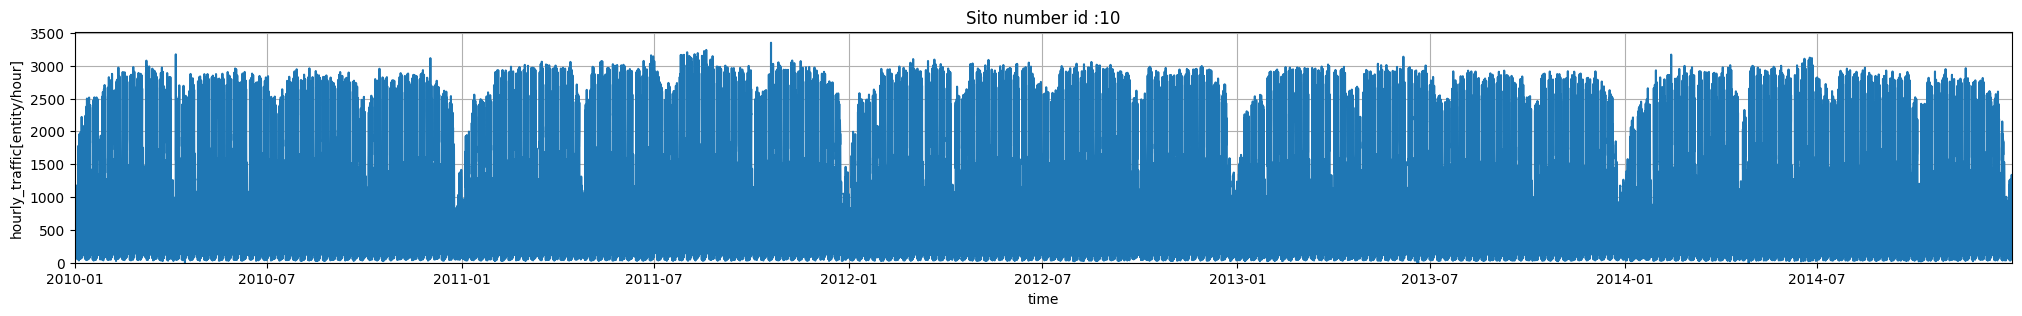

mean       std       min       25%       50%  \
hourly_traffic        0.548256  0.427252  0.000000  0.134444  0.472222   
temperature_2m        0.833086  0.301616  0.117000  0.612000  0.774500   
apparent_temperature  0.721823  0.344139 -0.049737  0.465404  0.656857   
relative_humidity_2m  0.657317  0.197985  0.081371  0.516910  0.679468   
precipitation         0.010049  0.049863  0.000000  0.000000  0.000000   
wind_speed_10m        1.068027  0.514500  0.000000  0.686417  1.012845   
cloud_cover           0.338667  0.311726  0.000000  0.030000  0.288000   

                           75%       max  
hourly_traffic        0.882778  1.861111  
temperature_2m        1.004500  2.019500  
apparent_temperature  0.925835  2.071331  
relative_humidity_2m  0.820077  1.000000  
precipitation         0.000000  1.560000  
wind_speed_10m        1.399428  3.755674  
cloud_cover           0.558000  1.000000

Site type: SIGNALISED_4_WAY_INTERSECTION


In [6]:
data = Dataset()
_ = data.select_site(10)

In [7]:
X_col     = Trainer.NEW_X_FEATURES
input_len = Trainer.NEW_X_WINDOWS

print(F"input_len={input_len}\nx_features={X_col}")

Train, Valid, Test = data.split_and_get_generators(X_col=X_col, input_size=input_len,batch_size=24)

input_len=13
x_features=['hourly_traffic', 'hour_of_day(sin)', 'hour_of_day(cos)', 'day_of_week(sin)', 'day_of_week(cos)', 'holiday', 'temperature_2m', 'apparent_temperature']


## Training of the LSTM and Linear model

In [8]:
patience_RLR = 3
patience_ES = 5
epochs = 12
plot_range = range(0,24*7*2)
sv_model = True
sv_step = False
trainer = Trainer(Train, Valid, Test, "Best_model_Workspace/" )

### Long Short-Term Memory



Training:



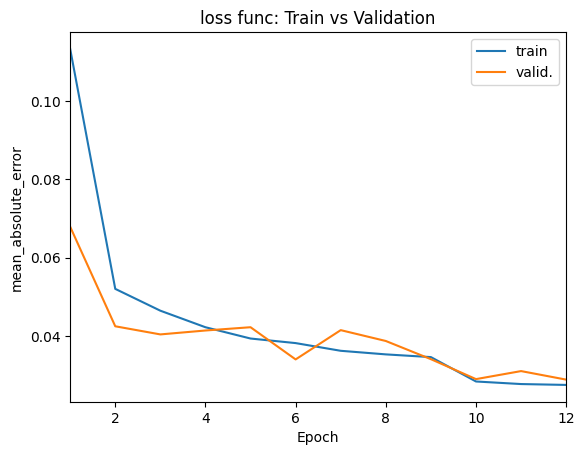

1095/1095 - 107s - 98ms/step - loss: 0.0018 - mean_absolute_error: 0.0274 - val_loss: 0.0021 - val_mean_absolute_error: 0.0288 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 12.
Saving model in ./models/Best_model_on1Site.keras

Training Score:
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 74s 67ms/step
mean_squared_error: 0.0018(0.0424) - mean_absolute_error: 0.0268
DeNorm_mean_squared_error: 5671.8599(75.3118) - DeNorm_mean_absolute_error: 48.2878


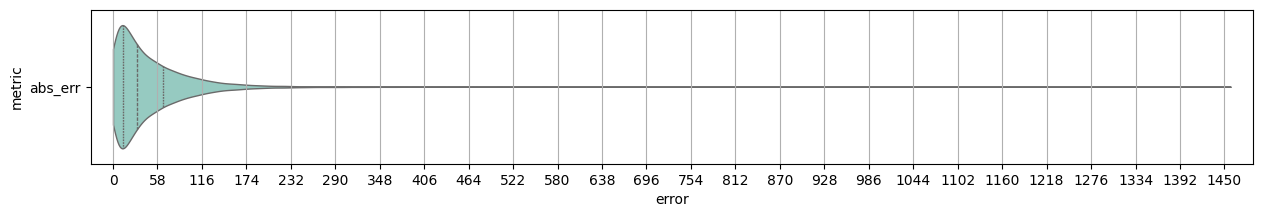

mean        std       min        25%        50%        75%  \
error  48.287765  57.795148  0.003077  13.046588  31.381682  65.694949   

               max  
error  1458.321667


Validation Score:
364/364 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step
mean_squared_error: 0.0021(0.0458) - mean_absolute_error: 0.0288
DeNorm_mean_squared_error: 6835.0938(82.6746) - DeNorm_mean_absolute_error: 51.8254


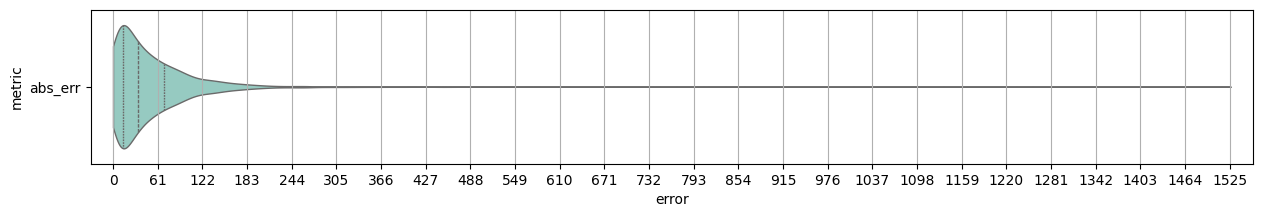

mean        std       min        25%        50%        75%  \
error  51.825392  64.418145  0.000658  13.410187  33.761353  70.236996   

               max  
error  1526.577082


Test Score:
364/364 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step
mean_squared_error: 0.0027(0.0520) - mean_absolute_error: 0.0350
DeNorm_mean_squared_error: 8668.6338(93.1055) - DeNorm_mean_absolute_error: 63.0382


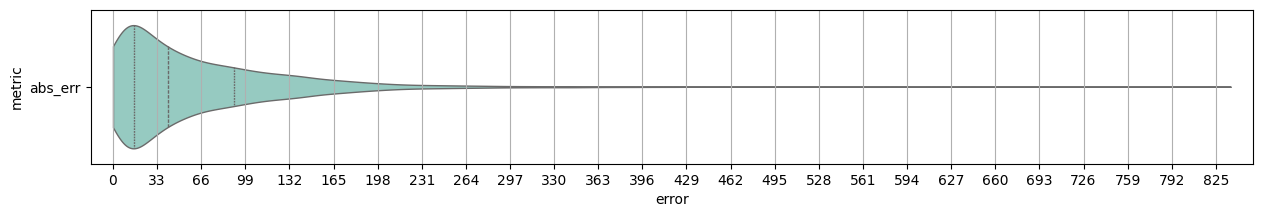

mean        std       min        25%        50%     75%  \
error  63.038213  68.522658  0.007442  15.473196  40.885458  90.286   

              max  
error  836.169814

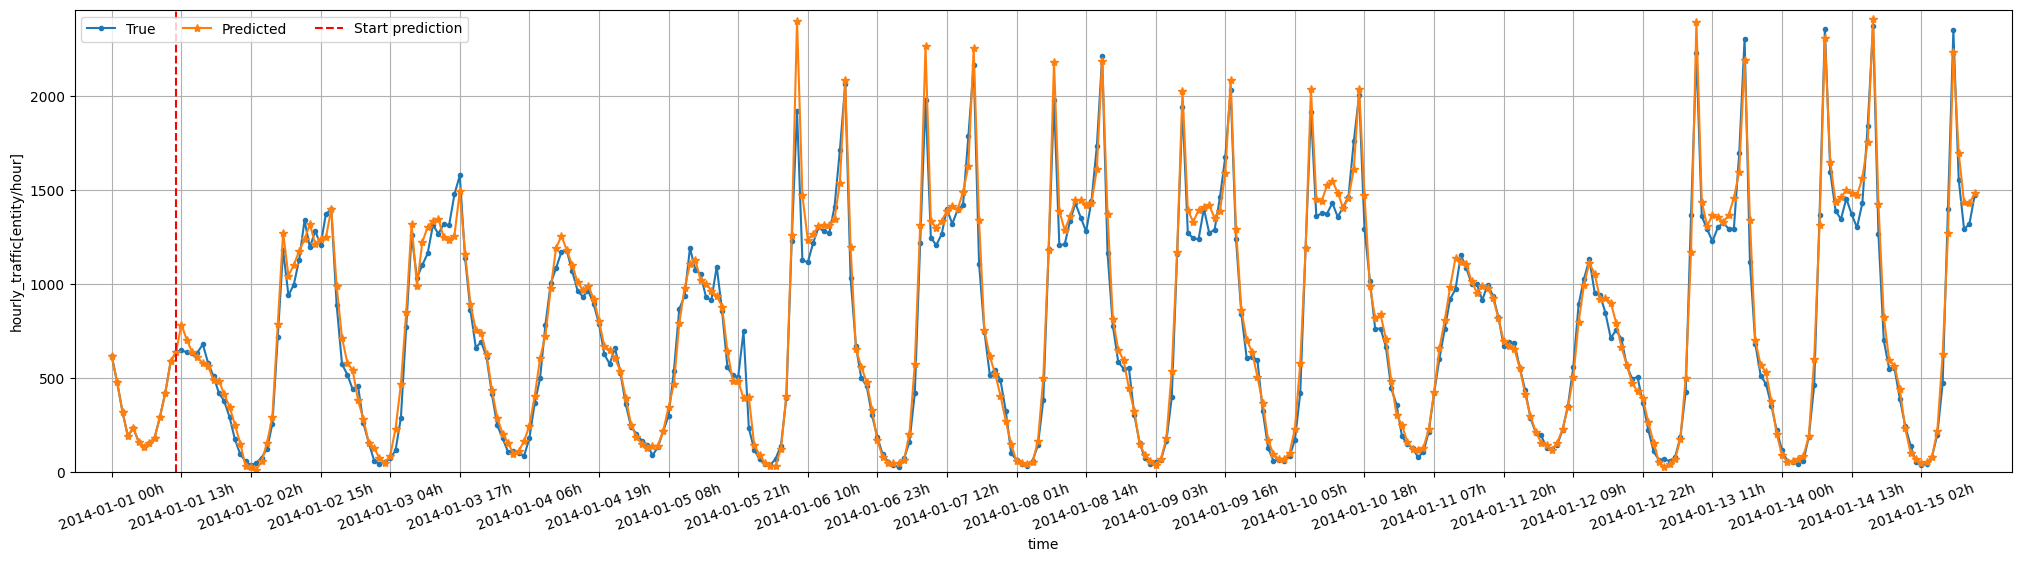

In [9]:
model_name = "Best_model_on1Site"
model_lstm = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(trainer.shape_X)),
    tf.keras.layers.LSTM(units=256, return_sequences=True),
    tf.keras.layers.LSTM(units=256, return_sequences=False),
    tf.keras.layers.Dense(units=64, activation="linear"),
    tf.keras.layers.Dense(units=trainer.shape_y, activation="linear")
])

model_lstm.name = "Best_model_on1Site"
_ = trainer.fit_on(
    on_model = model_lstm,
    N_epochs = epochs,
    patience_RLR = patience_RLR,
    patience_ES = patience_ES,
    plot_range=plot_range,
    save_model=sv_model,
    save_step=sv_step,
)

### Lineare



Training:



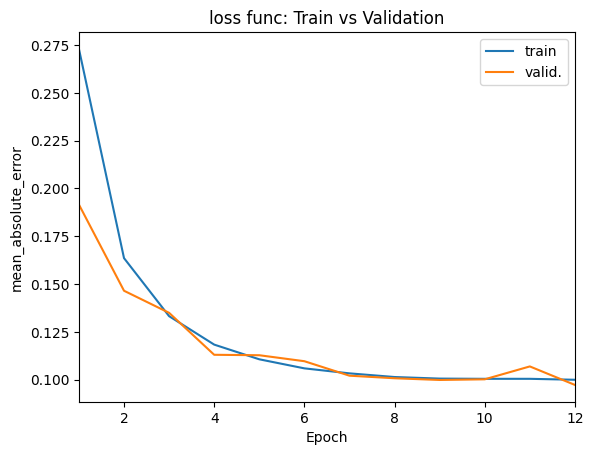

1095/1095 - 113s - 104ms/step - loss: 0.0216 - mean_absolute_error: 0.1000 - val_loss: 0.0206 - val_mean_absolute_error: 0.0973 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 12.
Saving model in ./models/Linear.keras

Training Score:
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 74s 68ms/step
mean_squared_error: 0.0208(0.1442) - mean_absolute_error: 0.0968
DeNorm_mean_squared_error: 67536.6797(259.8782) - DeNorm_mean_absolute_error: 174.1849


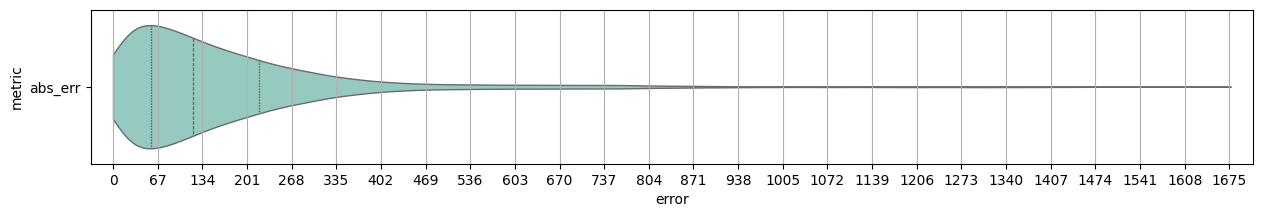

mean         std      min        25%         50%         75%  \
error  174.184948  192.867047  0.00337  56.380055  119.980173  219.630914   

               max  
error  1677.189283


Validation Score:
364/364 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step
mean_squared_error: 0.0206(0.1435) - mean_absolute_error: 0.0973
DeNorm_mean_squared_error: 66639.7656(258.1468) - DeNorm_mean_absolute_error: 175.1016


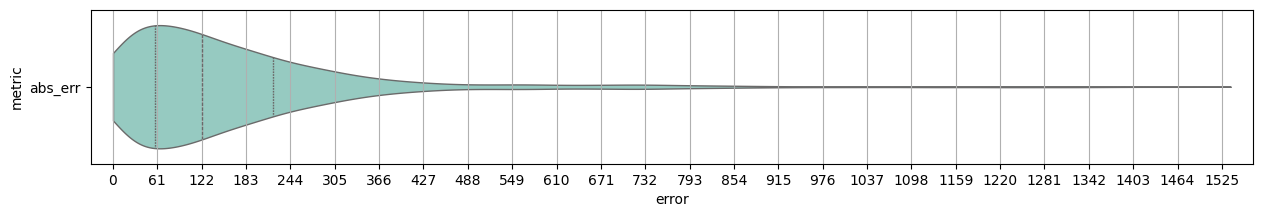

mean         std       min        25%        50%         75%  \
error  175.101605  189.692674  0.030085  58.296116  122.78047  220.308768   

               max  
error  1537.226658


Test Score:
364/364 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step
mean_squared_error: 0.0199(0.1411) - mean_absolute_error: 0.0985
DeNorm_mean_squared_error: 64360.9844(253.6947) - DeNorm_mean_absolute_error: 177.3006


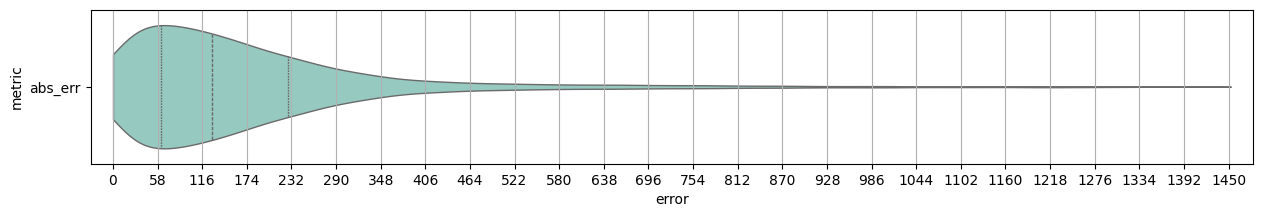

mean         std       min        25%         50%         75%  \
error  177.300606  181.464201  0.101004  62.544832  129.348228  227.285356   

               max  
error  1452.931784

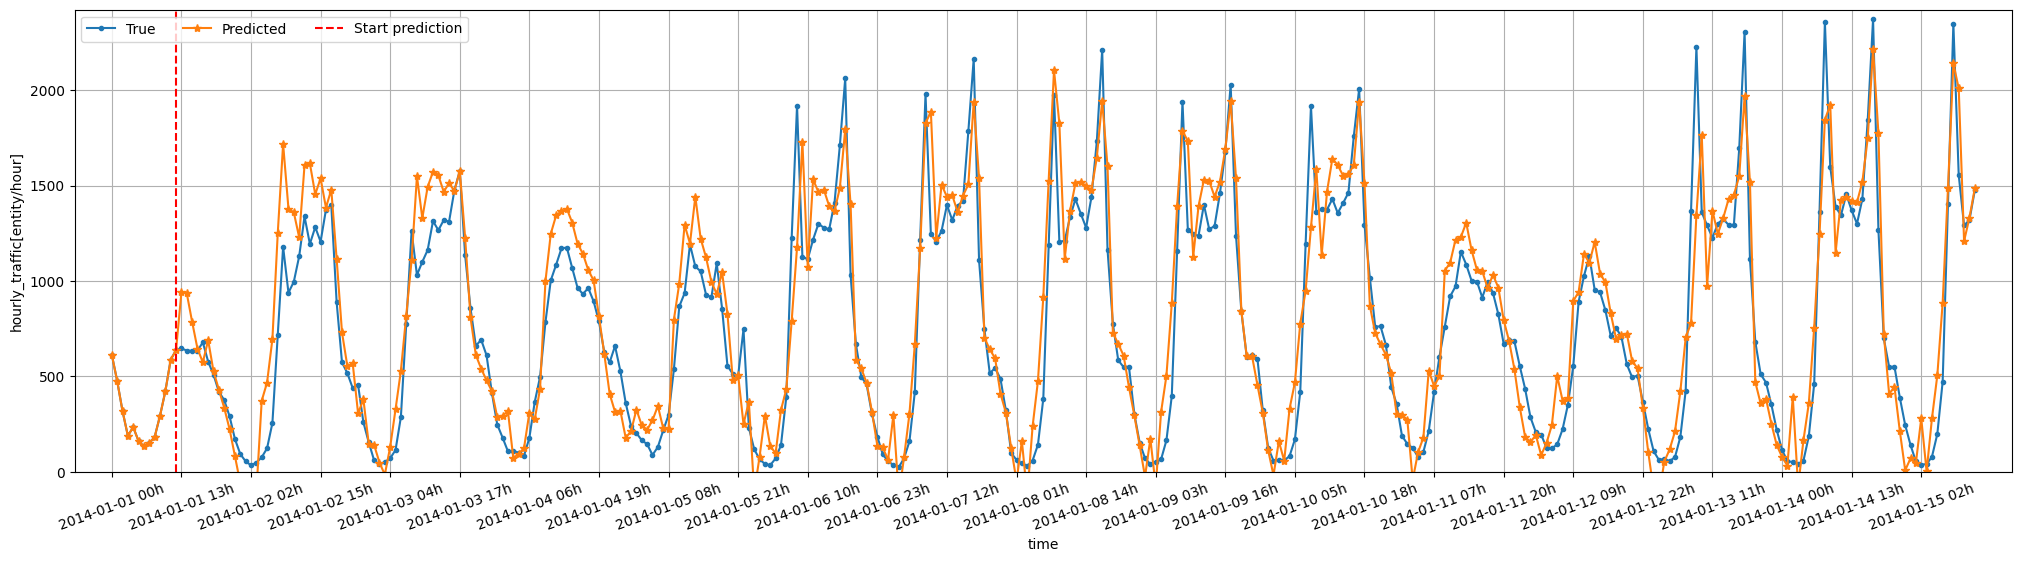

In [10]:
model_linear = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(trainer.shape_X)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(trainer.shape_y)
])

model_linear.name = "Linear"
_ = trainer.fit_on(
    on_model = model_linear,
    N_epochs = epochs,
    patience_RLR = patience_RLR,
    patience_ES = patience_ES,
    plot_range=plot_range,
    save_model=sv_model,
    save_step=sv_step,
)

## Confronto tra LSTM e lineare

Computing on linear...
-> Training...


-> Validation...
-> Test...
Computing on lstm...
-> Training...
-> Validation...
-> Test...


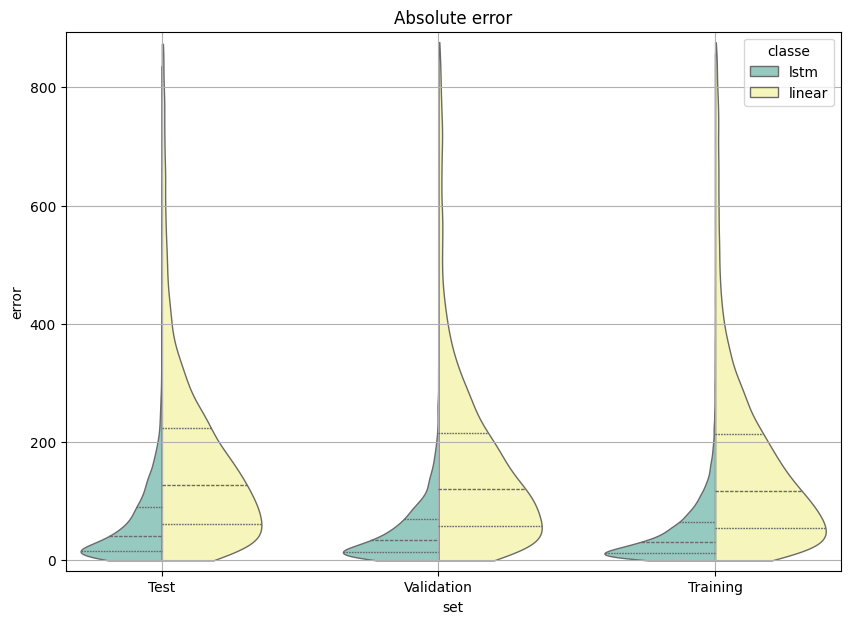

In [11]:
trainer.violin_plot_compare_model(models={"linear": model_linear, "lstm": model_lstm},cut= 800, filename="full_dataset_cmp")

## Free-run

In [13]:
trainer.Workspace

'img/Best_model_Space/'

Linear


Free-Run:   0%|          | 0/8747 [00:00<?, ?it/s]

Free-Run: 100%|██████████| 8747/8747 [01:09<00:00, 125.12it/s]


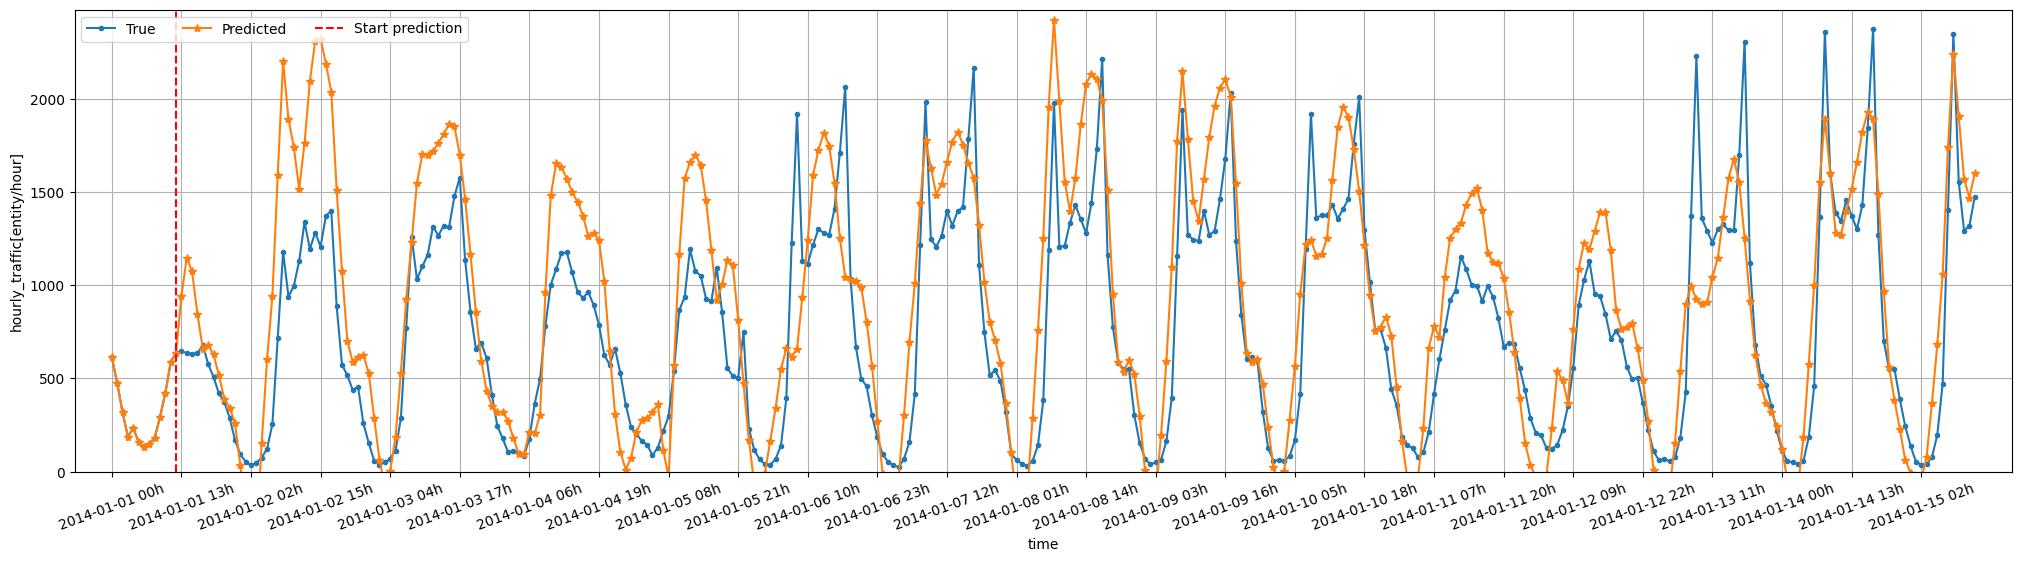

mean_squared_error: 0.0432(0.2078) - mean_absolute_error: 0.1461
DeNorm_mean_squared_error: 140066.9375(374.2552) - DeNorm_mean_absolute_error: 263.0281


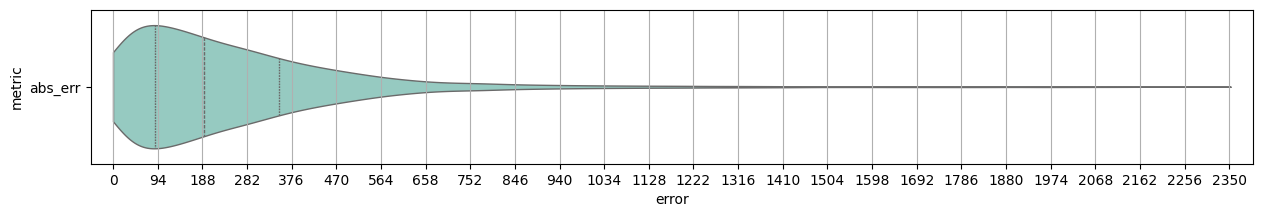

mean         std       min        25%         50%         75%  \
error  263.028141  266.254085  0.017887  88.525176  192.263418  348.478161   

               max  
error  2353.241096


---------------------------------------------------------------
LSTM


Free-Run: 100%|██████████| 8747/8747 [08:19<00:00, 17.52it/s]


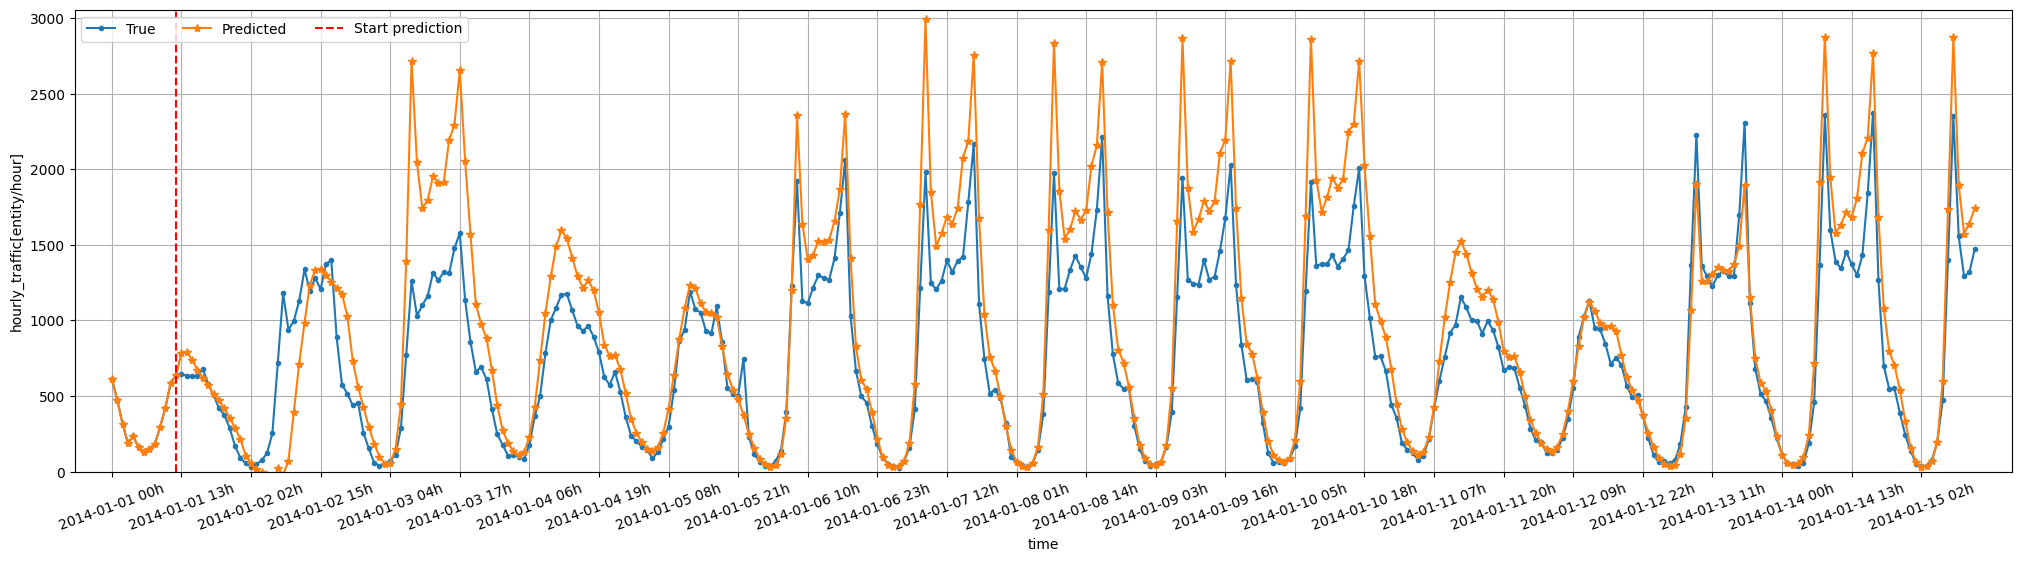

mean_squared_error: 0.0136(0.1166) - mean_absolute_error: 0.0656
DeNorm_mean_squared_error: 44066.0391(209.9191) - DeNorm_mean_absolute_error: 117.9921


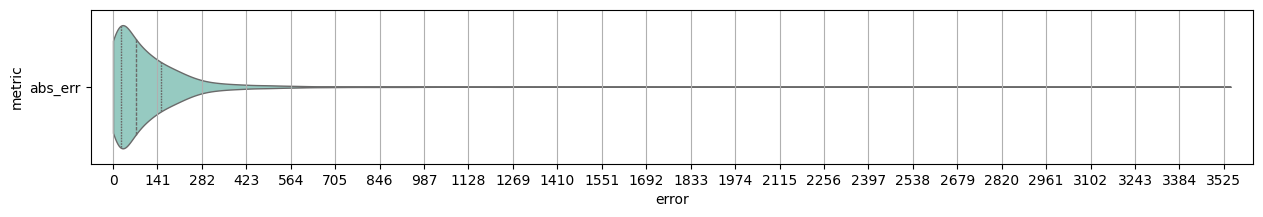

mean        std       min        25%        50%         75%  \
error  117.992053  173.62995  0.009031  24.067733  71.688811  153.639323   

               max  
error  3547.061239

In [15]:
free_run_range = plot_range
print("Linear")
_ = Trainer.free_run_with_plots(model_linear,Test,plot_range=free_run_range, folder=trainer.Workspace + model_linear.name+'/')
print("\n---------------------------------------------------------------\nLSTM")
_ = Trainer.free_run_with_plots(model_lstm,Test ,plot_range=free_run_range, folder=trainer.Workspace + model_lstm.name+'/')

## Same model but prediction on site adjacent to the starting point

In [16]:
model_10 = tf.keras.models.load_model('./models/Best_model_on1Site.keras')

In [17]:
def plot_traffic( src : pd.DataFrame, title : str = "Hourly_Traffic"):
    src = src.copy()
    src["date"] = pd.to_datetime(src.date)

    plt.figure(figsize=(32,3))
    plt.title(title)
    plt.plot(src["date"],src["hourly_traffic"]*1800)
    
    plt.xlabel("time")
    plt.ylabel("hourly_traffic")    
    plt.ylim(bottom = 0)
    plt.grid(visible=True)
    plt.margins(0)
    plt.show()

Sito di partenza:


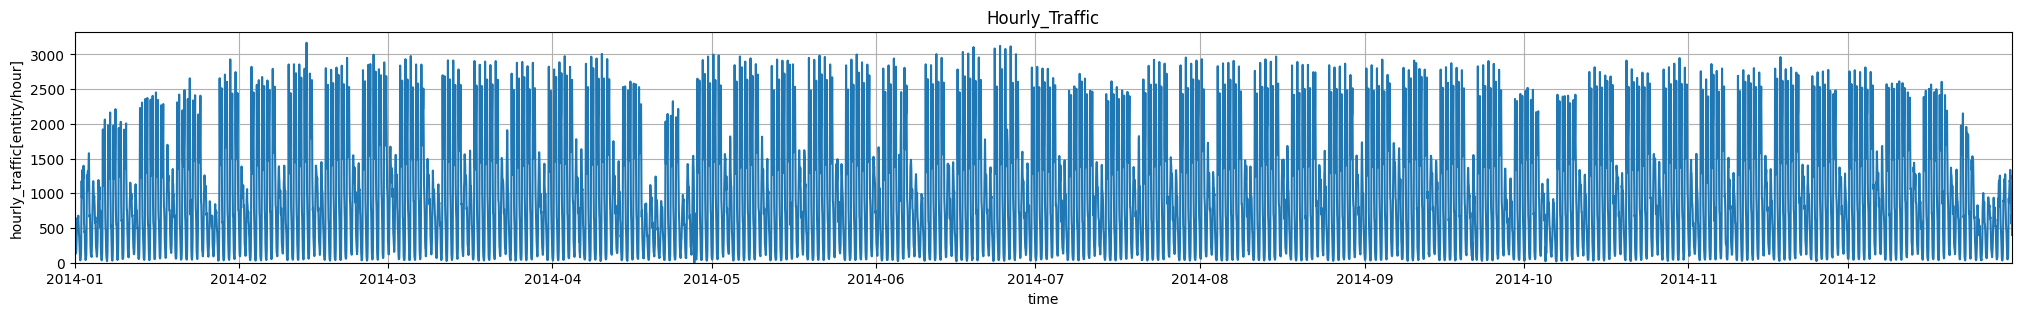

In [18]:
print("Sito di partenza:")
Test.plot_df()

In [21]:
trainer.Workspace+model_10.name+"/"

'img/Best_model_Space/Best_model_on1Site/'

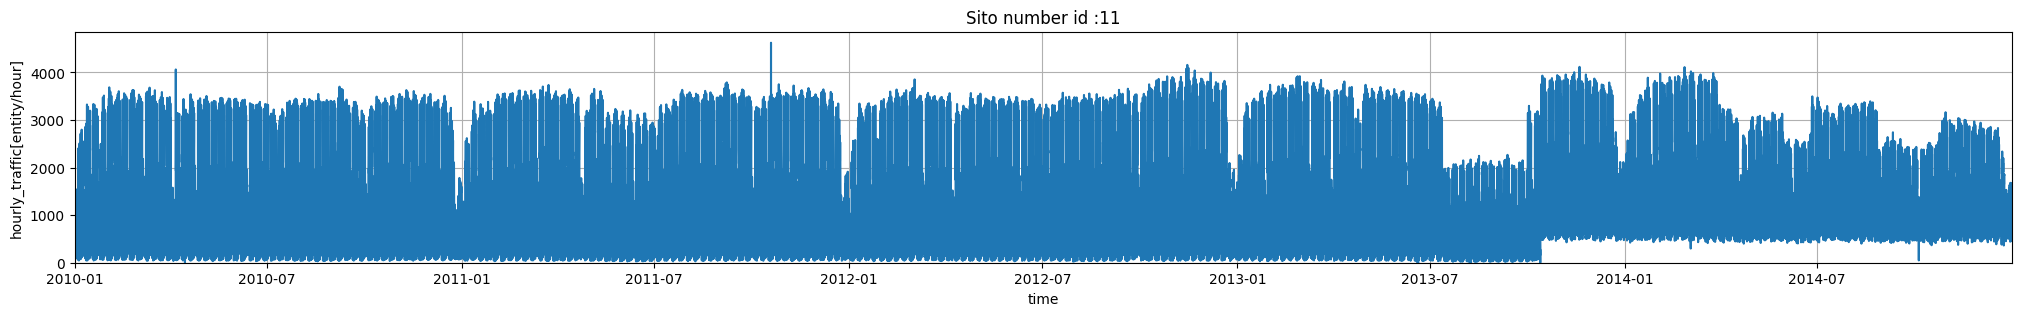

mean       std       min       25%       50%  \
hourly_traffic        0.723123  0.515374  0.000000  0.287778  0.643889   
temperature_2m        0.833086  0.301616  0.117000  0.612000  0.774500   
apparent_temperature  0.721823  0.344139 -0.049737  0.465404  0.656857   
relative_humidity_2m  0.657317  0.197985  0.081371  0.516910  0.679468   
precipitation         0.010049  0.049863  0.000000  0.000000  0.000000   
wind_speed_10m        1.068027  0.514500  0.000000  0.686417  1.012845   
cloud_cover           0.338667  0.311726  0.000000  0.030000  0.288000   

                           75%       max  
hourly_traffic        1.121667  2.569444  
temperature_2m        1.004500  2.019500  
apparent_temperature  0.925835  2.071331  
relative_humidity_2m  0.820077  1.000000  
precipitation         0.000000  1.560000  
wind_speed_10m        1.399428  3.755674  
cloud_cover           0.558000  1.000000

Site type: SIGNALISED_4_WAY_INTERSECTION

Prediction Scores:
272/272 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step
mean_squared_error: 0.0443(0.2105) - mean_absolute_error: 0.1493
DeNorm_mean_squared_error: 143507.9219(378.8244) - DeNorm_mean_absolute_error: 268.7412


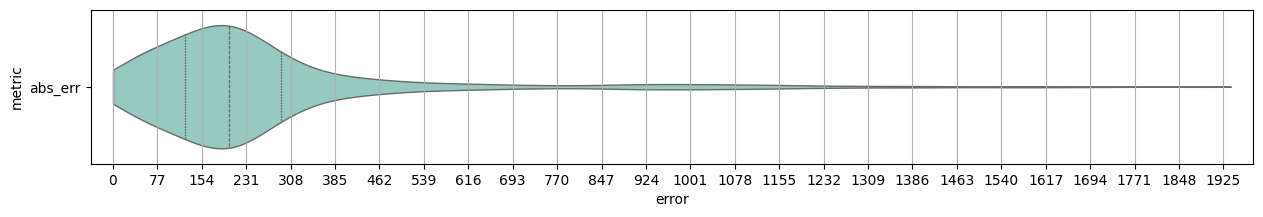

mean         std       min         25%         50%         75%  \
error  268.741174  267.009918  0.035106  125.385739  200.895004  291.565892   

               max  
error  1937.921643

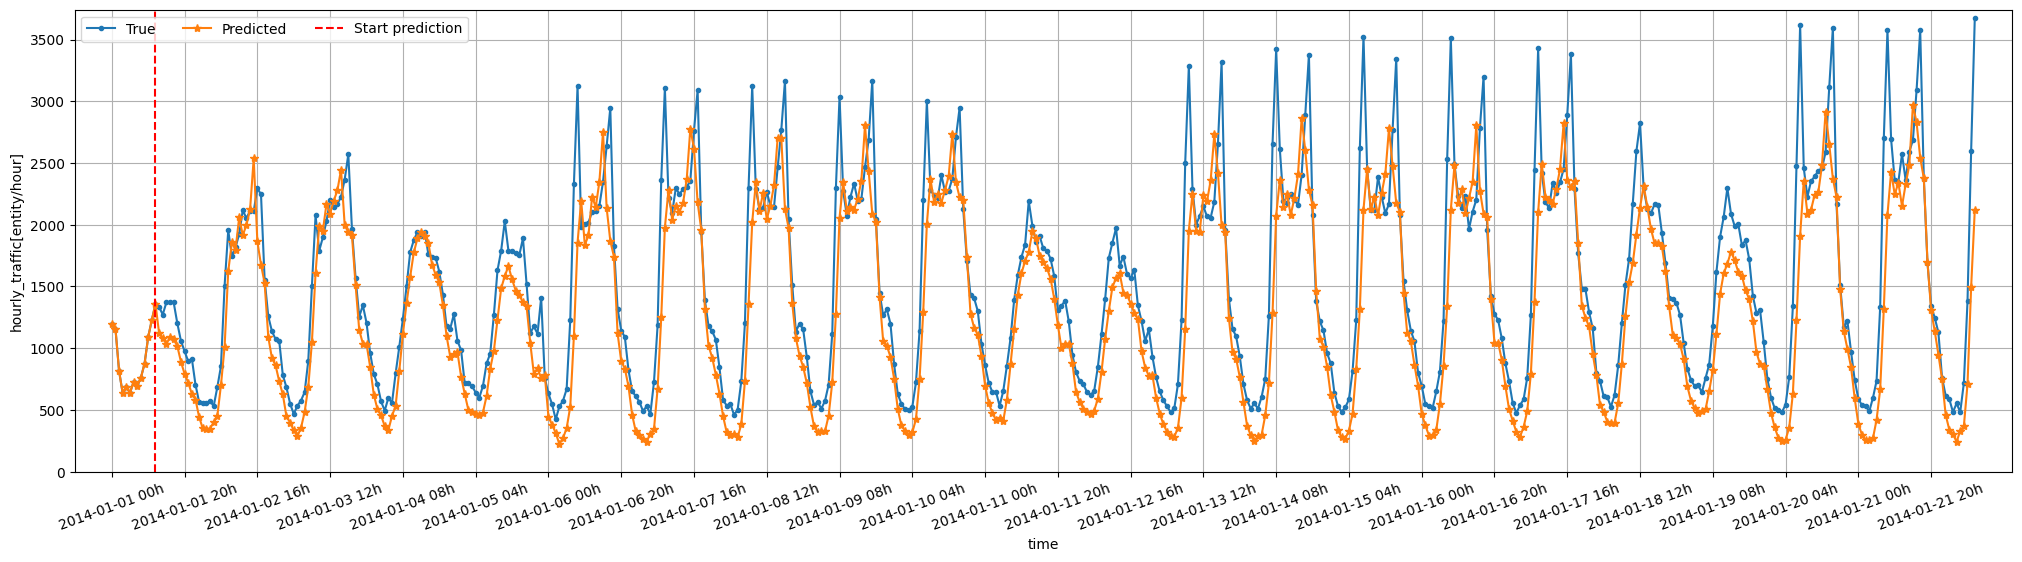

---

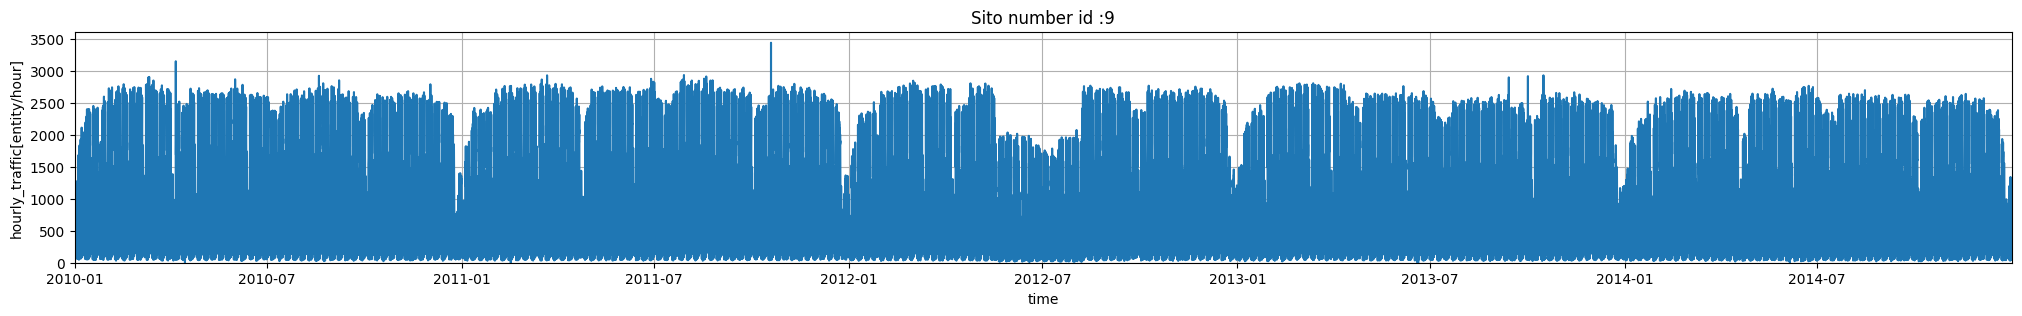

mean       std       min       25%       50%  \
hourly_traffic        0.530524  0.398291  0.000000  0.143333  0.478056   
temperature_2m        0.833086  0.301616  0.117000  0.612000  0.774500   
apparent_temperature  0.721823  0.344139 -0.049737  0.465404  0.656857   
relative_humidity_2m  0.657317  0.197985  0.081371  0.516910  0.679468   
precipitation         0.010049  0.049863  0.000000  0.000000  0.000000   
wind_speed_10m        1.068027  0.514500  0.000000  0.686417  1.012845   
cloud_cover           0.338667  0.311726  0.000000  0.030000  0.288000   

                           75%       max  
hourly_traffic        0.855556  1.911667  
temperature_2m        1.004500  2.019500  
apparent_temperature  0.925835  2.071331  
relative_humidity_2m  0.820077  1.000000  
precipitation         0.000000  1.560000  
wind_speed_10m        1.399428  3.755674  
cloud_cover           0.558000  1.000000

Site type: SIGNALISED_4_WAY_INTERSECTION

Prediction Scores:
272/272 ━━━━━━━━━━━━━━━━━━━━ 15s 56ms/step
mean_squared_error: 0.0033(0.0574) - mean_absolute_error: 0.0375
DeNorm_mean_squared_error: 10602.1084(102.9665) - DeNorm_mean_absolute_error: 67.5035


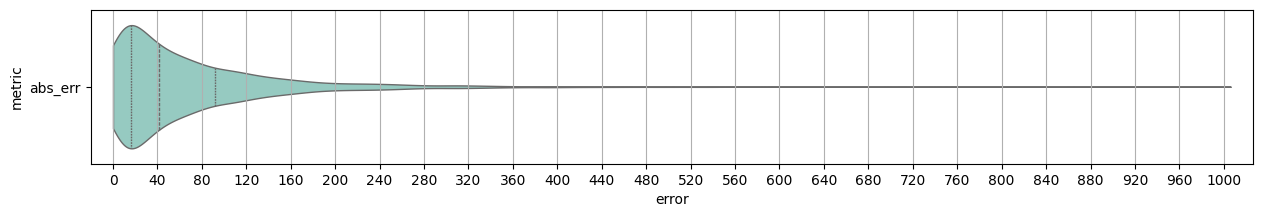

mean        std       min        25%        50%        75%  \
error  67.503453  77.756589  0.006547  15.957457  41.675222  91.633631   

               max  
error  1006.290006

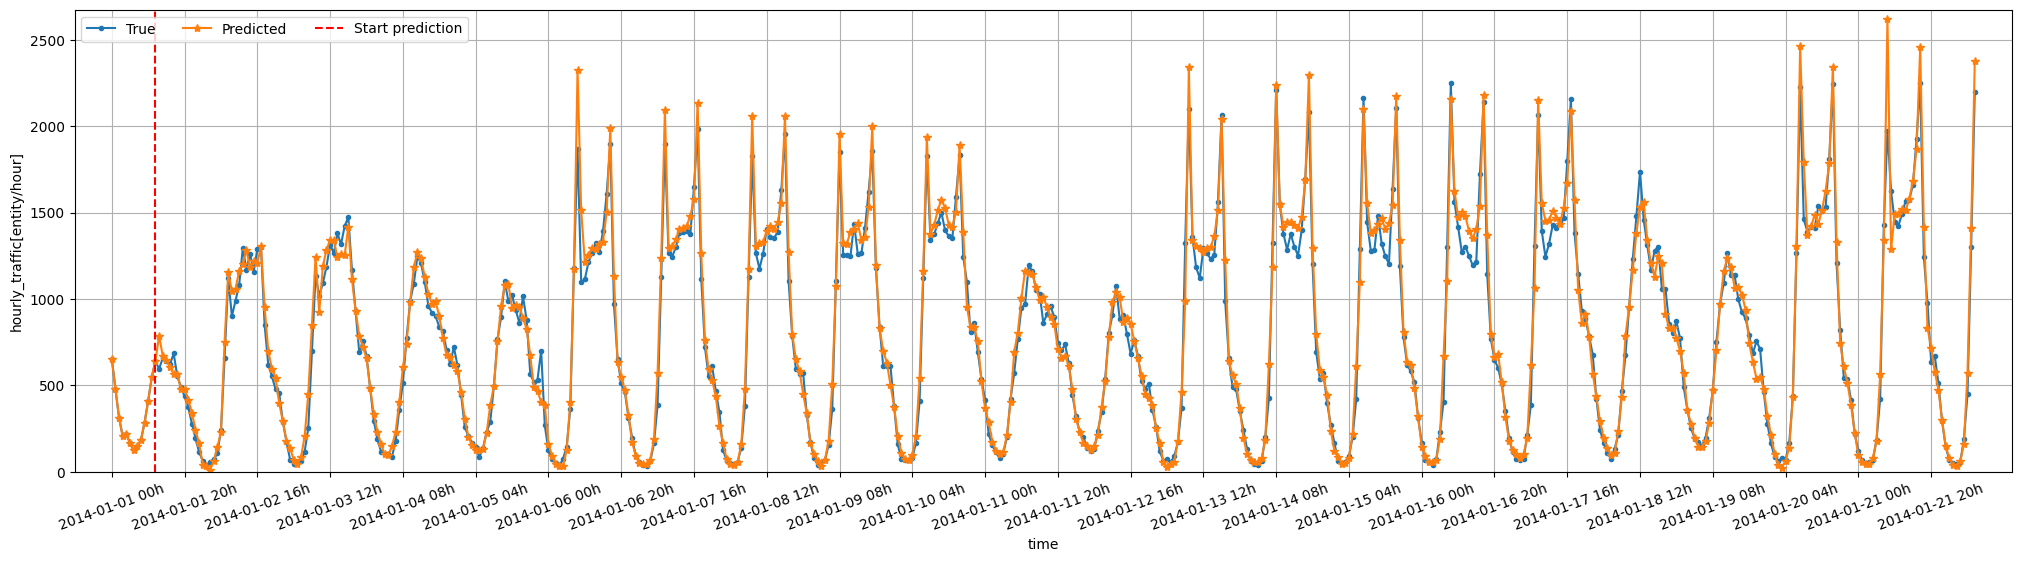

---

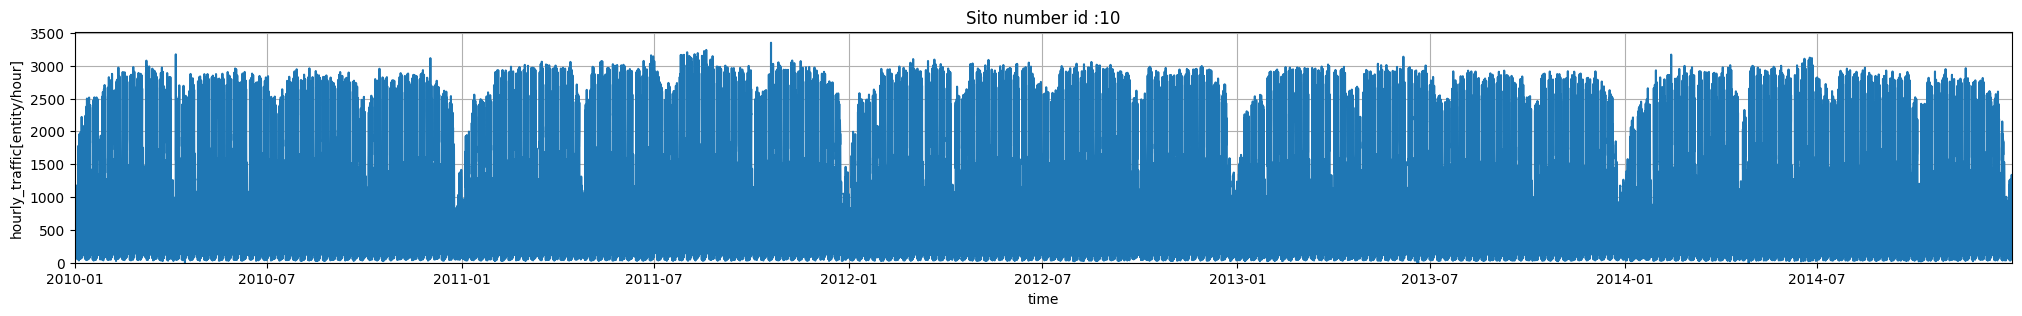

mean       std       min       25%       50%  \
hourly_traffic        0.548256  0.427252  0.000000  0.134444  0.472222   
temperature_2m        0.833086  0.301616  0.117000  0.612000  0.774500   
apparent_temperature  0.721823  0.344139 -0.049737  0.465404  0.656857   
relative_humidity_2m  0.657317  0.197985  0.081371  0.516910  0.679468   
precipitation         0.010049  0.049863  0.000000  0.000000  0.000000   
wind_speed_10m        1.068027  0.514500  0.000000  0.686417  1.012845   
cloud_cover           0.338667  0.311726  0.000000  0.030000  0.288000   

                           75%       max  
hourly_traffic        0.882778  1.861111  
temperature_2m        1.004500  2.019500  
apparent_temperature  0.925835  2.071331  
relative_humidity_2m  0.820077  1.000000  
precipitation         0.000000  1.560000  
wind_speed_10m        1.399428  3.755674  
cloud_cover           0.558000  1.000000

Site type: SIGNALISED_4_WAY_INTERSECTION

Prediction Scores:
272/272 ━━━━━━━━━━━━━━━━━━━━ 17s 62ms/step
mean_squared_error: 0.0027(0.0520) - mean_absolute_error: 0.0350
DeNorm_mean_squared_error: 8675.0566(93.1400) - DeNorm_mean_absolute_error: 63.0450


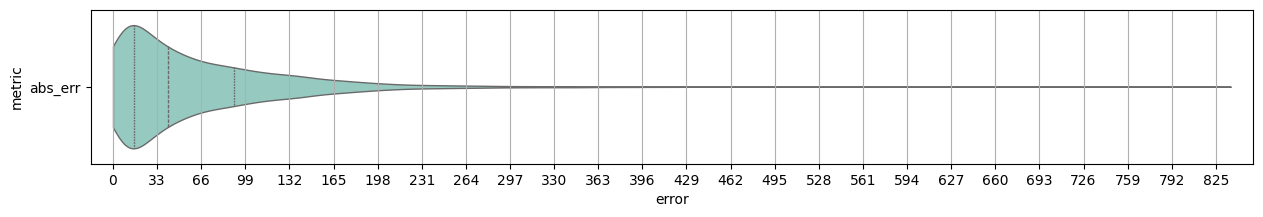

mean        std       min        25%        50%     75%  \
error  63.045006  68.563291  0.007442  15.451772  40.885458  90.286   

              max  
error  836.169814

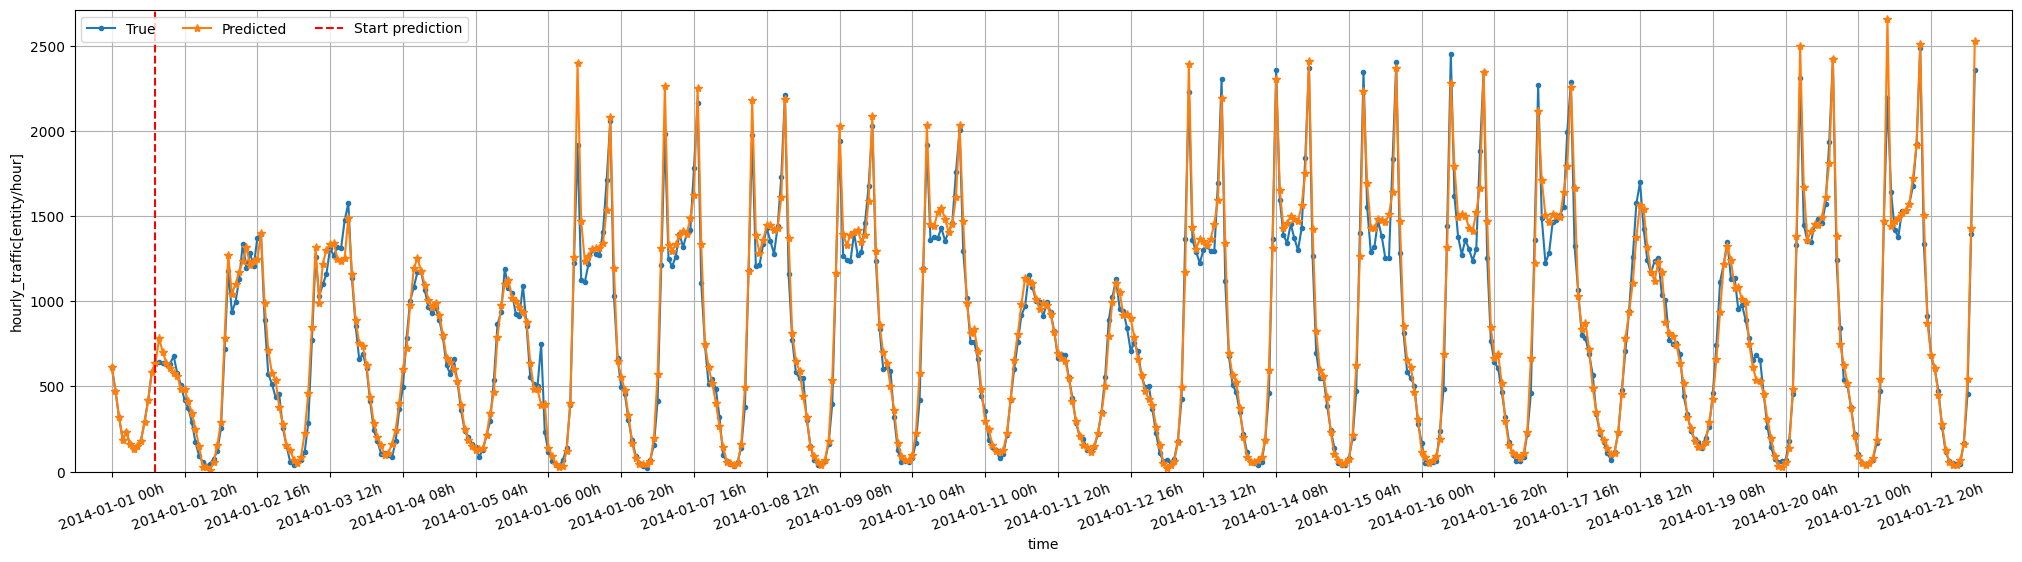

In [23]:
_ = data.select_site(11)
_, _, Test_11 = data.split_and_get_generators(X_col=X_col, input_size=input_len)
_ = Trainer.predict_and_compare(model_lstm, Test_11, path=trainer.Workspace+model_10.name+"/11_")

display(Markdown("---"))
_ = data.select_site(9)
_, _, Test_9 = data.split_and_get_generators(X_col=X_col, input_size=input_len)
_ = Trainer.predict_and_compare(model_lstm, Test_9,path=trainer.Workspace+model_10.name+"/09_")

display(Markdown("---"))
_ = data.select_site(10)
_, _, Test_10 = data.split_and_get_generators(X_col=X_col, input_size=input_len)
_ = Trainer.predict_and_compare(model_lstm, Test_10,path=trainer.Workspace+model_10.name+"/10_")

## Predictions with Training

### Let's try on site no. 108

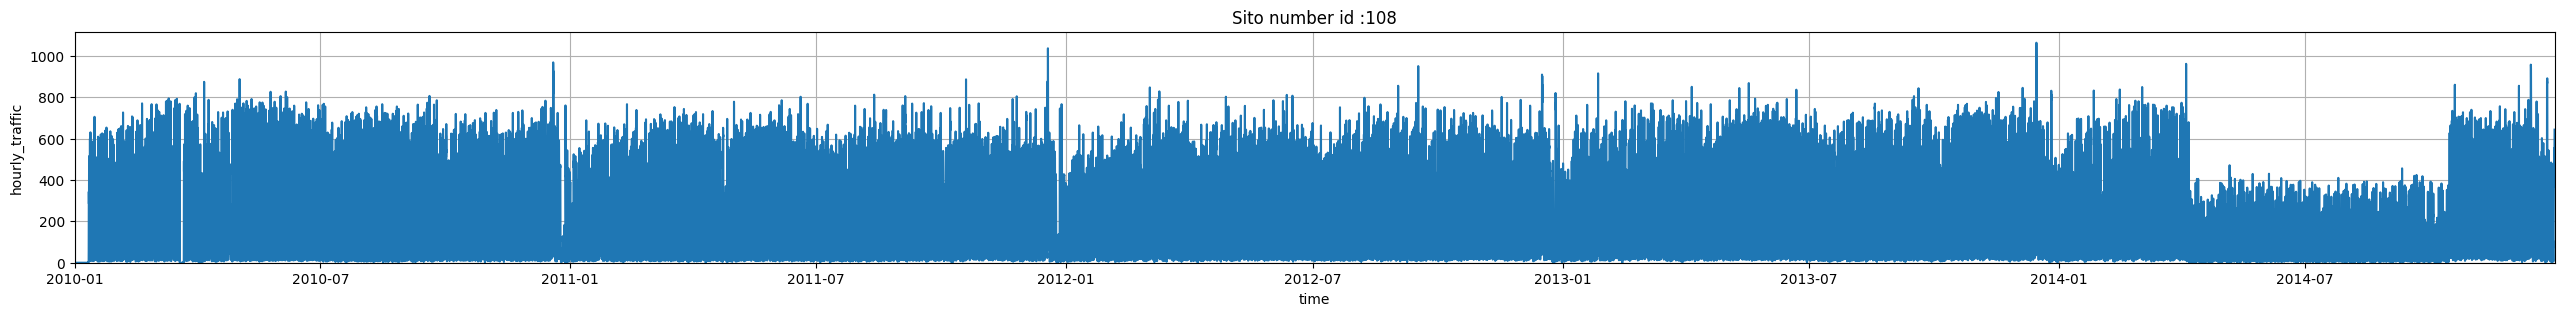

mean       std       min       25%       50%  \
hourly_traffic        0.132019  0.116493  0.000000  0.021111  0.091111   
temperature_2m        0.833086  0.301616  0.117000  0.612000  0.774500   
apparent_temperature  0.721823  0.344139 -0.049737  0.465404  0.656857   
relative_humidity_2m  0.657317  0.197985  0.081371  0.516910  0.679468   
precipitation         0.010049  0.049863  0.000000  0.000000  0.000000   
wind_speed_10m        1.068027  0.514500  0.000000  0.686417  1.012845   
cloud_cover           0.338667  0.311726  0.000000  0.030000  0.288000   

                           75%       max  
hourly_traffic        0.231667  0.590556  
temperature_2m        1.004500  2.019500  
apparent_temperature  0.925835  2.071331  
relative_humidity_2m  0.820077  1.000000  
precipitation         0.000000  1.560000  
wind_speed_10m        1.399428  3.755674  
cloud_cover           0.558000  1.000000

Site type: SD_SIGNALISED_PEDESTRIAN_CROSSING


In [ ]:
_ = data.select_site(108)

In [ ]:
Train, Valid, Test = data.split_and_get_generators(X_col=X_col, input_size=input_len)
del trainer
trainer = Trainer(Train, Valid, Test)

#### Long Short-Term Memory



Training:



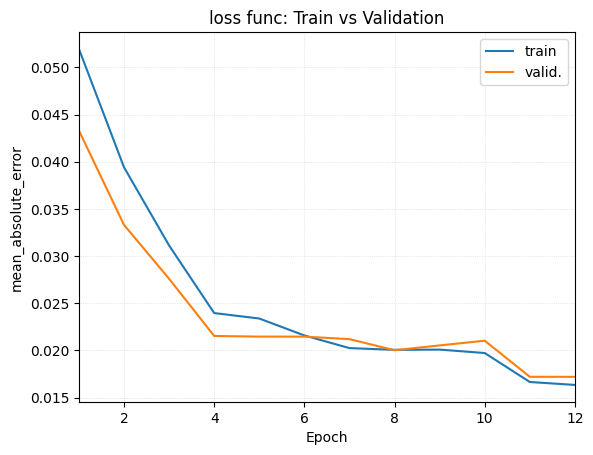

821/821 - 84s - 102ms/step - loss: 6.2614e-04 - mean_absolute_error: 0.0163 - val_loss: 7.1159e-04 - val_mean_absolute_error: 0.0172 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 12.
Saving model in ./models/model_20240526-1424.keras

Training Score:
821/821 ━━━━━━━━━━━━━━━━━━━━ 86s 104ms/step
mean_squared_error: 0.0006(0.0245) - mean_absolute_error: 0.0162
DeNorm_mean_squared_error: 2003.1630(44.7567) - DeNorm_mean_absolute_error: 29.0961


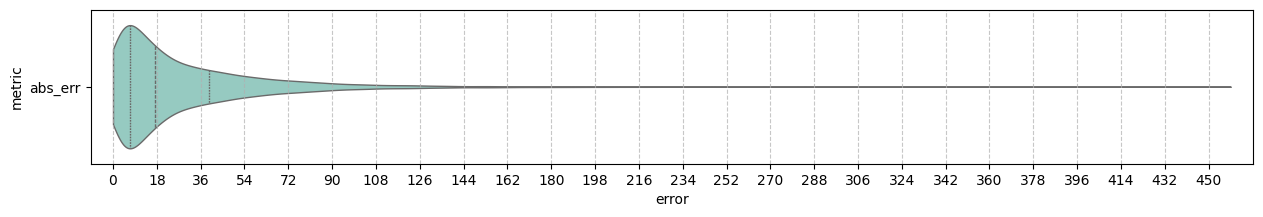

mean        std       min       25%        50%        75%  \
error  29.096121  34.009156  0.003753  7.086196  17.328703  39.608315   

              max  
error  459.134854


Validation Score:
272/272 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step
mean_squared_error: 0.0007(0.0265) - mean_absolute_error: 0.0172
DeNorm_mean_squared_error: 2305.5371(48.0160) - DeNorm_mean_absolute_error: 30.9637


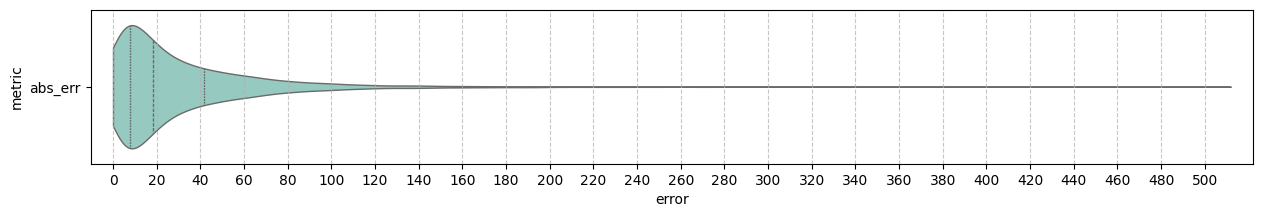

mean        std       min       25%        50%        75%  \
error  30.963674  36.700718  0.001266  7.743893  18.511106  41.558801   

              max  
error  511.886623


Test Score:
272/272 ━━━━━━━━━━━━━━━━━━━━ 18s 67ms/step
mean_squared_error: 0.0010(0.0316) - mean_absolute_error: 0.0216
DeNorm_mean_squared_error: 3382.7361(58.1613) - DeNorm_mean_absolute_error: 38.7975


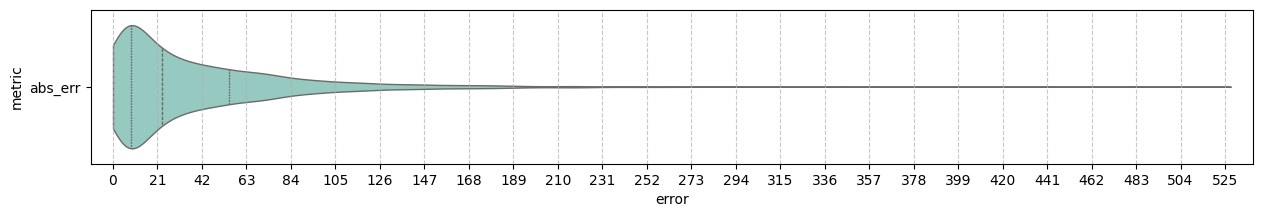

mean        std       min       25%        50%        75%  \
error  38.797521  43.332484  0.004233  8.577906  23.330153  54.912403   

             max  
error  527.74236

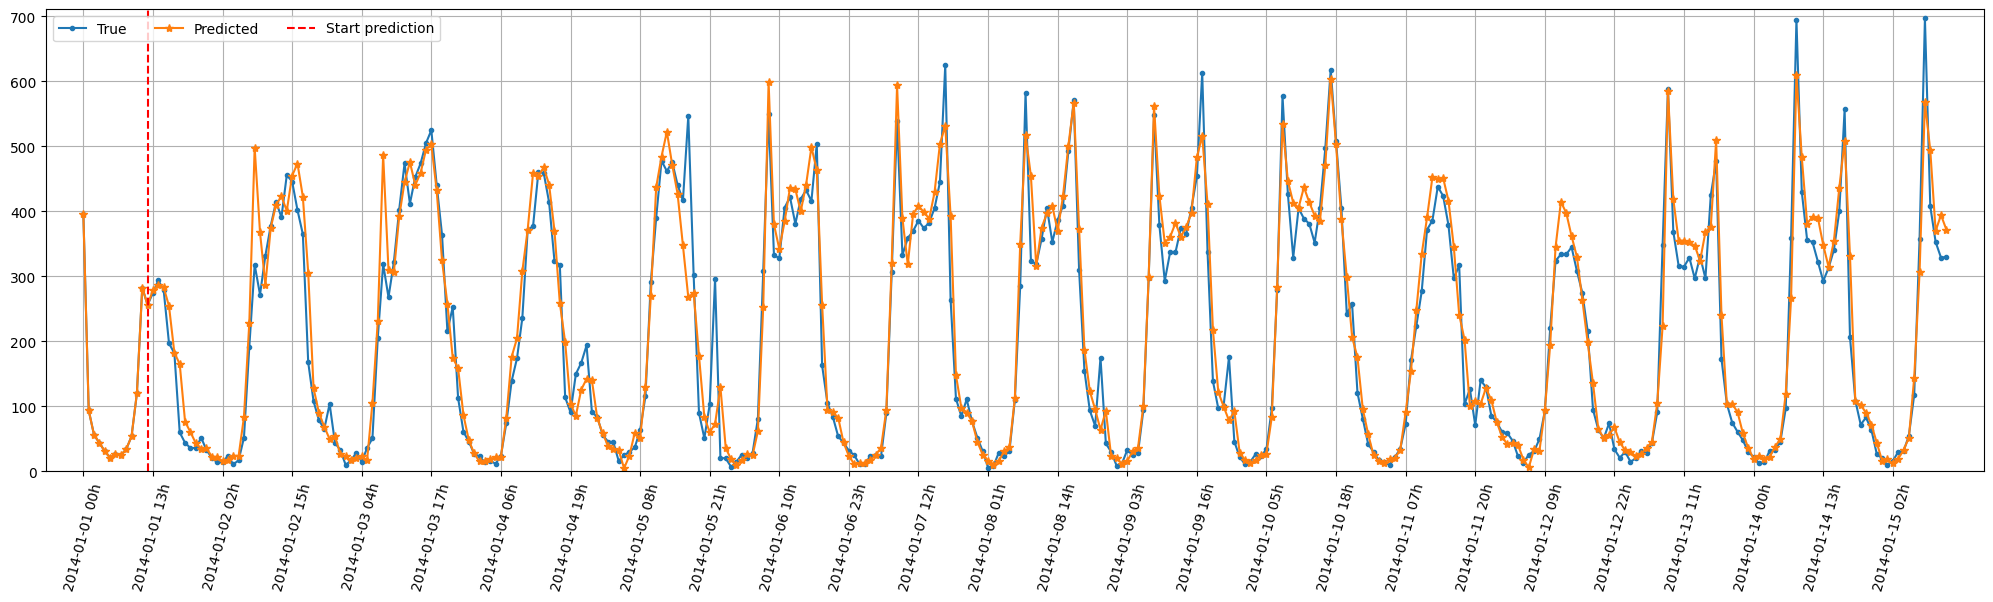

In [ ]:
model_lstm = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(trainer.shape_X)),
    tf.keras.layers.LSTM(units=256, return_sequences=True),
    tf.keras.layers.LSTM(units=256, return_sequences=False),
    tf.keras.layers.Dense(units=64, activation="linear"),
    tf.keras.layers.Dense(units=trainer.shape_y, activation="linear")
])

_ = trainer.fit_on(
    on_model         = model_lstm,
    N_epochs         = epochs,
    patience_RLR     = patience_RLR,
    patience_ES      = patience_ES,
    plot_range = plot_range,
    save_model       = sv_model,
    save_step        = sv_step
)

#### Lineare



Training:



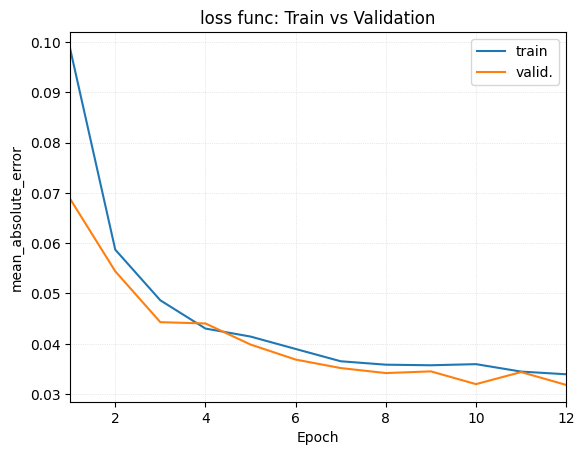

821/821 - 56s - 69ms/step - loss: 0.0021 - mean_absolute_error: 0.0339 - val_loss: 0.0020 - val_mean_absolute_error: 0.0318 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 12.
Saving model in ./models/model_20240526-1424.keras

Training Score:
821/821 ━━━━━━━━━━━━━━━━━━━━ 57s 70ms/step
mean_squared_error: 0.0019(0.0436) - mean_absolute_error: 0.0314
DeNorm_mean_squared_error: 6026.0933(77.6279) - DeNorm_mean_absolute_error: 56.4398


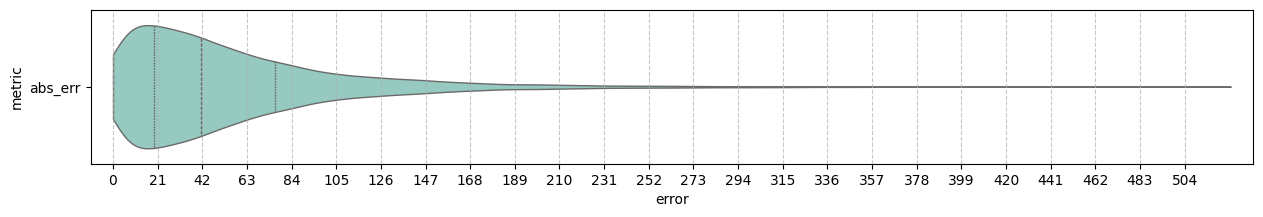

mean       std      min      25%        50%        75%         max
error  56.43984  53.29865  0.00743  19.4567  41.379511  75.978424  525.744961


Validation Score:
272/272 ━━━━━━━━━━━━━━━━━━━━ 16s 57ms/step
mean_squared_error: 0.0020(0.0447) - mean_absolute_error: 0.0318
DeNorm_mean_squared_error: 6379.3276(79.8707) - DeNorm_mean_absolute_error: 57.2930


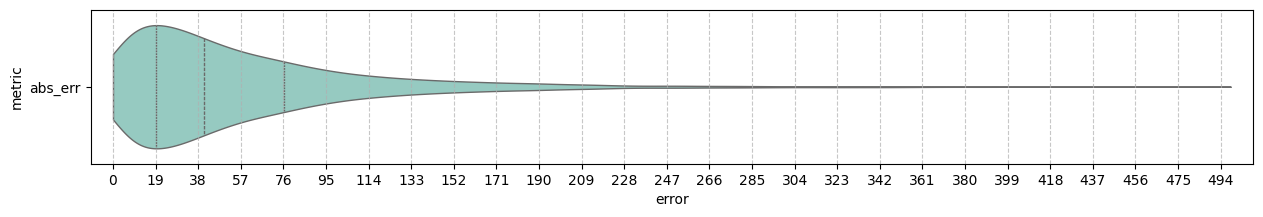

mean        std       min        25%        50%        75%  \
error  57.293025  55.652429  0.007924  19.140079  40.723131  76.483831   

              max  
error  498.531133


Test Score:
272/272 ━━━━━━━━━━━━━━━━━━━━ 17s 62ms/step
mean_squared_error: 0.0021(0.0458) - mean_absolute_error: 0.0342
DeNorm_mean_squared_error: 6715.4727(81.9480) - DeNorm_mean_absolute_error: 61.6452


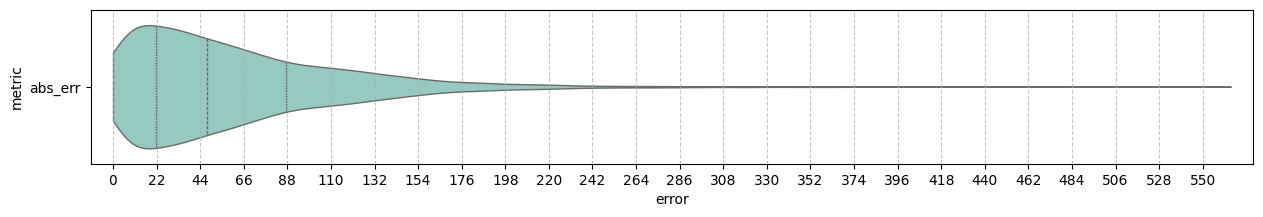

mean        std       min       25%        50%        75%  \
error  61.645232  53.996973  0.006763  21.57347  47.491802  87.111483   

              max  
error  564.167777

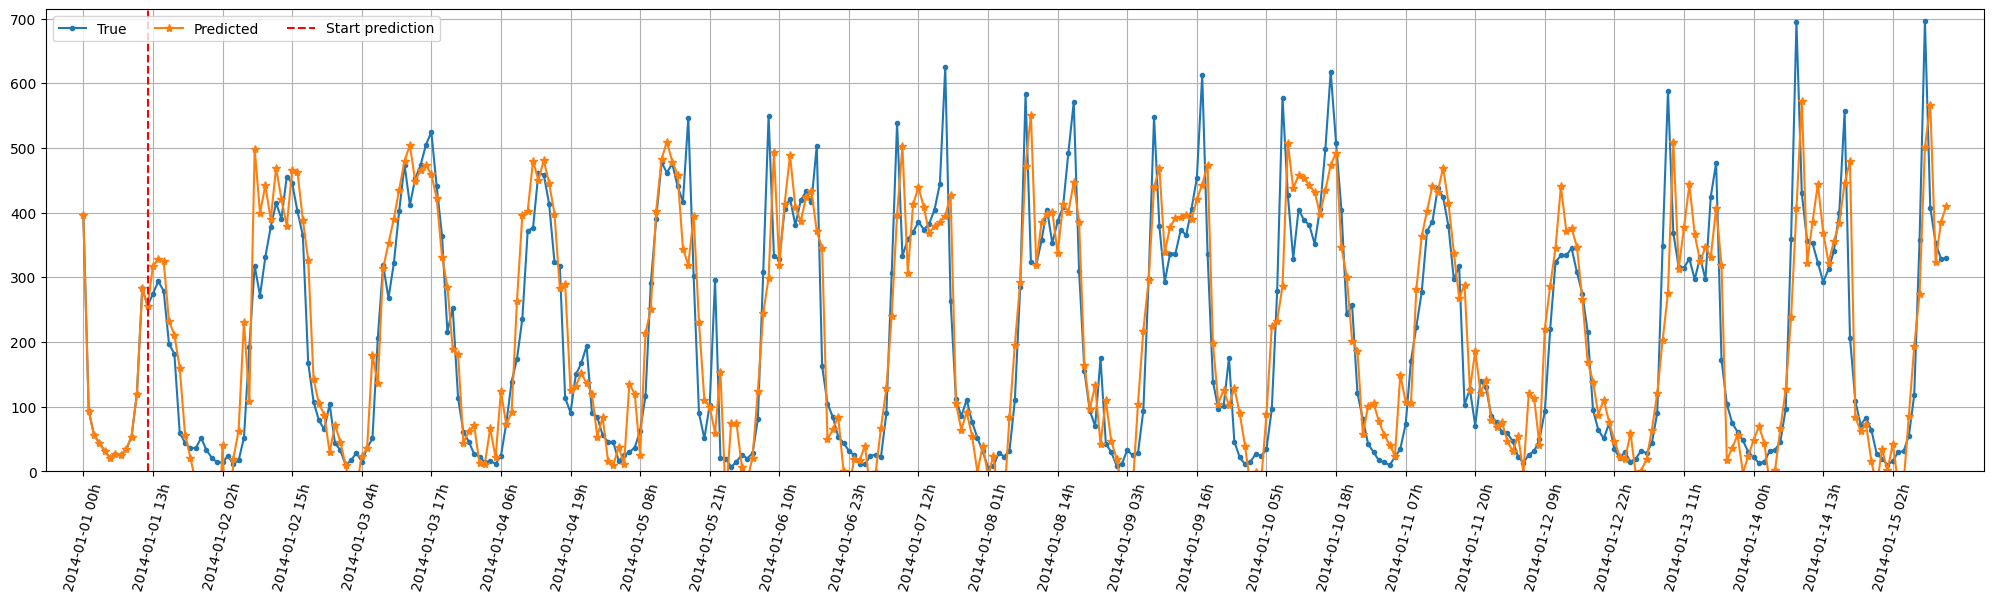

In [ ]:
model_linear = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(trainer.shape_X)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(trainer.shape_y)
])

_ = trainer.fit_on(
    on_model         = model_linear,
    N_epochs         = epochs,
    patience_RLR     = patience_RLR,
    patience_ES      = patience_ES,
    plot_range = plot_range,
    save_model       = sv_model,
    save_step        = sv_step
)

Computing on linear...
-> Training...
-> Validation...
-> Test...
Computing on lstm...
-> Training...
-> Validation...
-> Test...


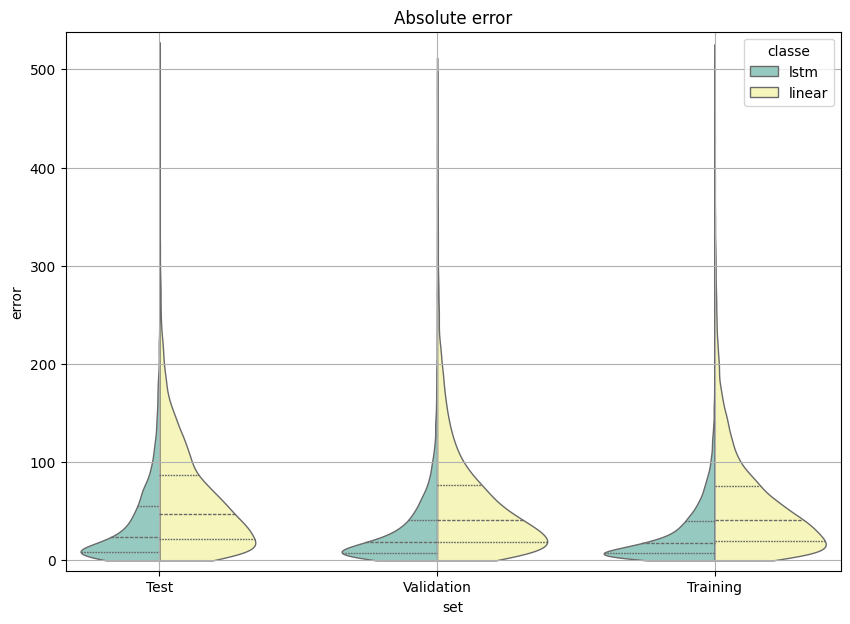

In [ ]:
trainer.violin_plot_compare_model(models={"linear": model_linear, "lstm": model_lstm}, cut=0)

### Test on site no. 97

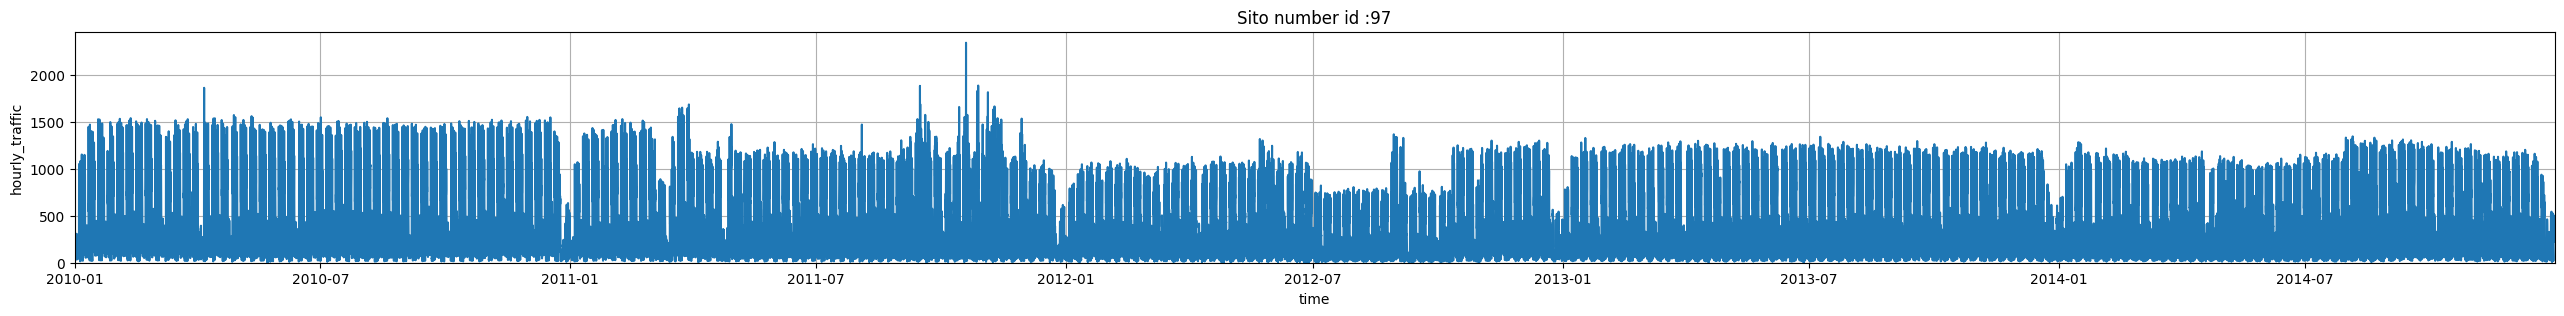

mean       std       min       25%       50%  \
hourly_traffic        0.227792  0.186692  0.000000  0.065556  0.172778   
temperature_2m        0.833086  0.301616  0.117000  0.612000  0.774500   
apparent_temperature  0.721823  0.344139 -0.049737  0.465404  0.656857   
relative_humidity_2m  0.657317  0.197985  0.081371  0.516910  0.679468   
precipitation         0.010049  0.049863  0.000000  0.000000  0.000000   
wind_speed_10m        1.068027  0.514500  0.000000  0.686417  1.012845   
cloud_cover           0.338667  0.311726  0.000000  0.030000  0.288000   

                           75%       max  
hourly_traffic        0.381111  1.301111  
temperature_2m        1.004500  2.019500  
apparent_temperature  0.925835  2.071331  
relative_humidity_2m  0.820077  1.000000  
precipitation         0.000000  1.560000  
wind_speed_10m        1.399428  3.755674  
cloud_cover           0.558000  1.000000

Site type: SIGNALISED_4_WAY_INTERSECTION


In [ ]:
_ = data.select_site(97)

In [ ]:
Train, Valid, Test = data.split_and_get_generators(X_col=X_col, input_size=input_len)
del trainer
trainer = Trainer(Train, Valid, Test)



Training:



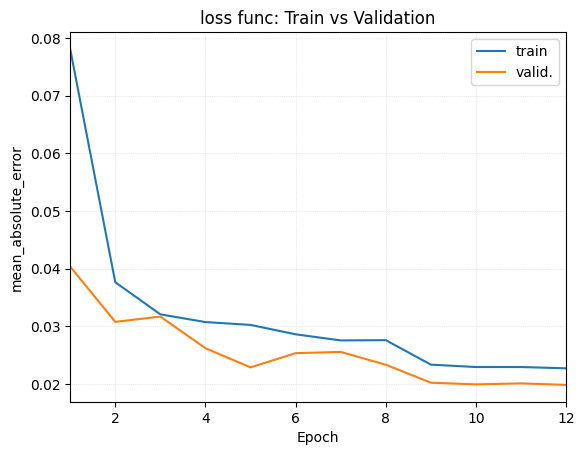


Epoch 12: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
821/821 - 89s - 109ms/step - loss: 0.0013 - mean_absolute_error: 0.0227 - val_loss: 7.8021e-04 - val_mean_absolute_error: 0.0198 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 12.
Saving model in ./models/model_20240526-1424.keras

Training Score:
821/821 ━━━━━━━━━━━━━━━━━━━━ 71s 86ms/step
mean_squared_error: 0.0013(0.0361) - mean_absolute_error: 0.0225
DeNorm_mean_squared_error: 4092.1091(63.9696) - DeNorm_mean_absolute_error: 40.4360


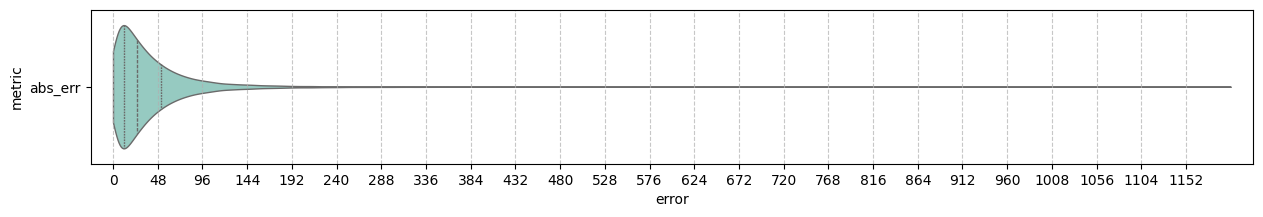

mean        std       min        25%        50%        75%  \
error  40.436012  49.569463  0.002039  11.502616  26.167117  51.392825   

               max  
error  1200.097684


Validation Score:
272/272 ━━━━━━━━━━━━━━━━━━━━ 18s 67ms/step
mean_squared_error: 0.0008(0.0283) - mean_absolute_error: 0.0198
DeNorm_mean_squared_error: 2527.8818(50.2780) - DeNorm_mean_absolute_error: 35.7212


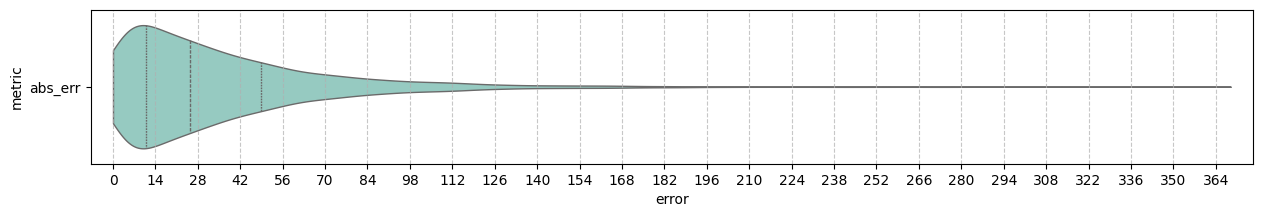

mean        std       min        25%        50%        75%  \
error  35.721149  35.383973  0.000674  10.974036  25.433925  48.759225   

              max  
error  368.954602


Test Score:
272/272 ━━━━━━━━━━━━━━━━━━━━ 17s 62ms/step
mean_squared_error: 0.0010(0.0316) - mean_absolute_error: 0.0220
DeNorm_mean_squared_error: 3313.0767(57.5593) - DeNorm_mean_absolute_error: 39.6728


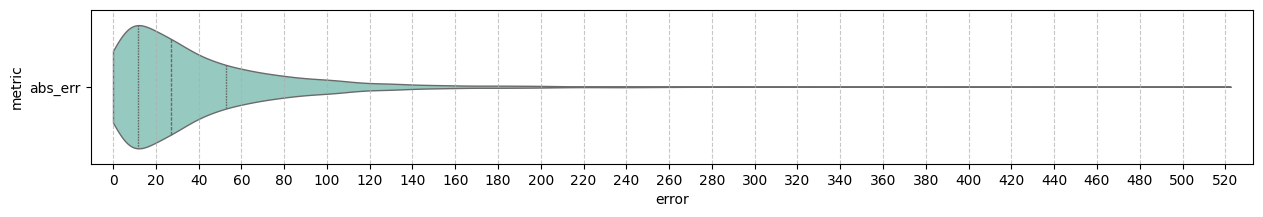

mean        std       min        25%        50%        75%  \
error  39.672795  41.705465  0.002059  11.737662  26.895311  52.909111   

              max  
error  522.575222

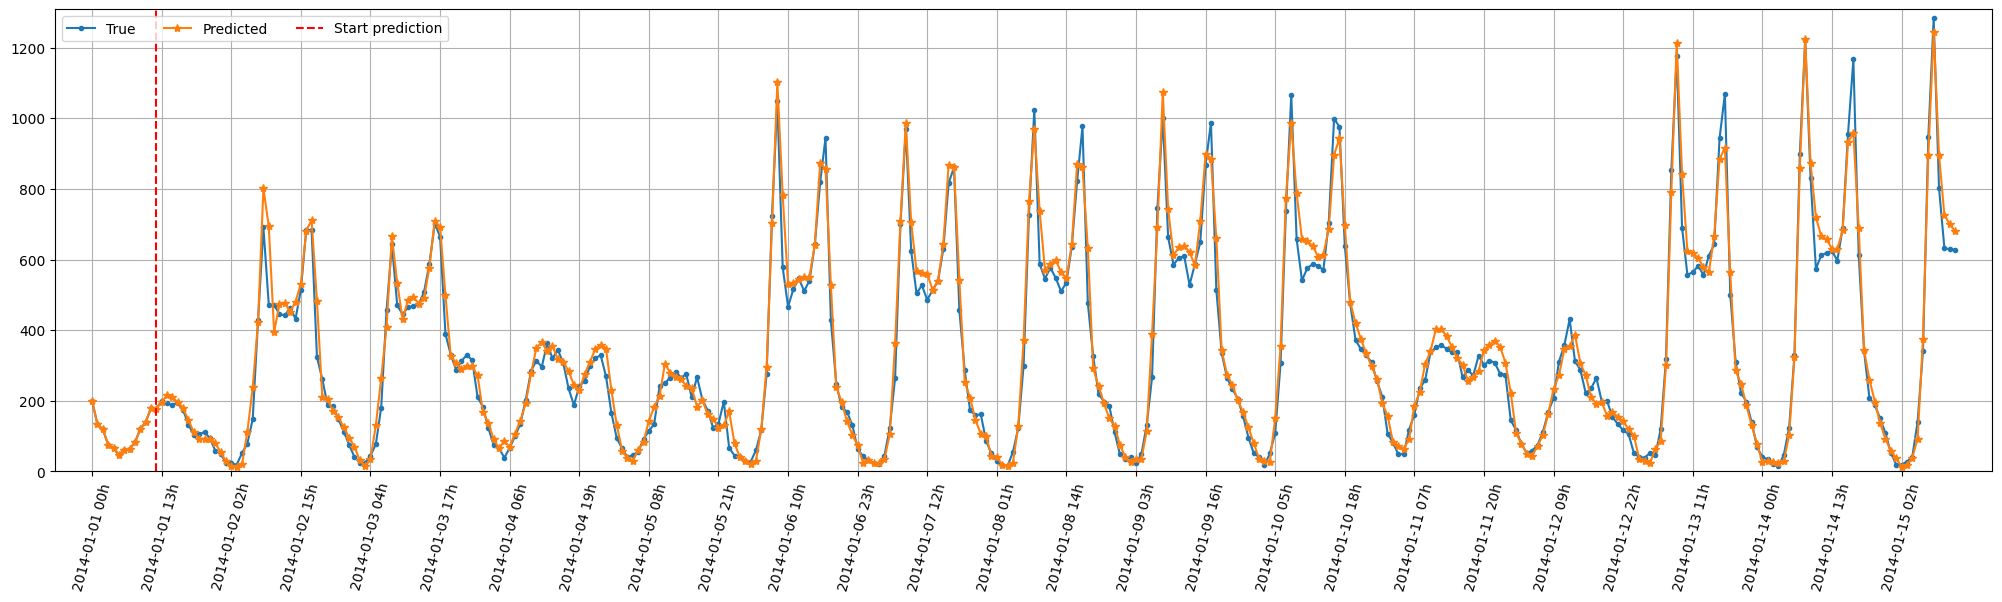

In [ ]:
model_lstm = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(trainer.shape_X)),
    tf.keras.layers.LSTM(units=256, return_sequences=True),
    tf.keras.layers.LSTM(units=256, return_sequences=False),
    tf.keras.layers.Dense(units=64, activation="linear"),
    tf.keras.layers.Dense(units=trainer.shape_y, activation="linear")
])

_ = trainer.fit_on(
    on_model         = model_lstm,
    N_epochs         = epochs,
    patience_RLR     = patience_RLR,
    patience_ES      = patience_ES,
    plot_range = plot_range,
    save_model       = sv_model,
    save_step        = sv_step
)



Training:



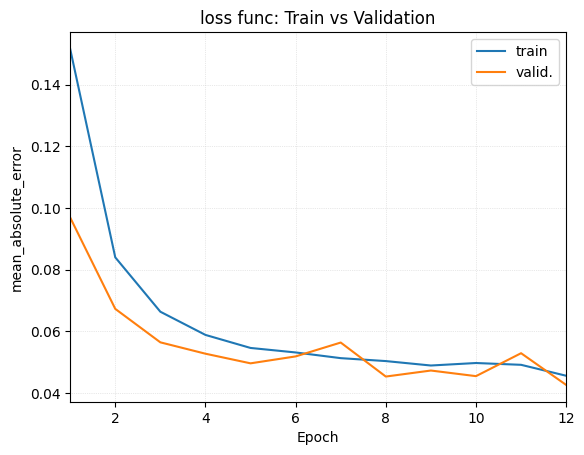

821/821 - 80s - 97ms/step - loss: 0.0046 - mean_absolute_error: 0.0457 - val_loss: 0.0036 - val_mean_absolute_error: 0.0427 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 12.
Saving model in ./models/model_20240526-1424.keras

Training Score:
821/821 ━━━━━━━━━━━━━━━━━━━━ 63s 77ms/step
mean_squared_error: 0.0045(0.0671) - mean_absolute_error: 0.0455
DeNorm_mean_squared_error: 14676.7373(121.1476) - DeNorm_mean_absolute_error: 81.9122


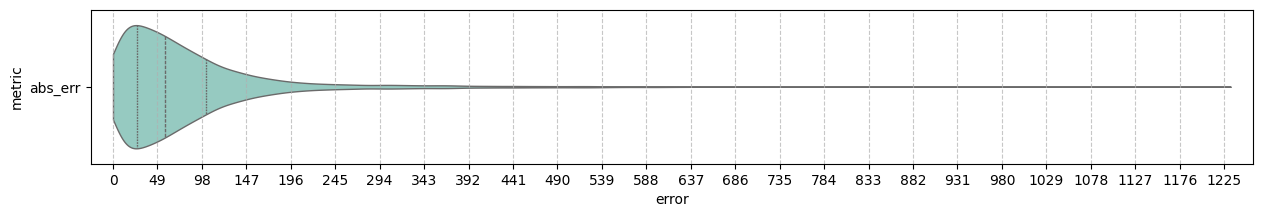

mean        std       min      25%        50%         75%  \
error  81.91214  89.260532  0.000379  26.9799  57.291729  102.606636   

               max  
error  1232.381695


Validation Score:
272/272 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step
mean_squared_error: 0.0036(0.0600) - mean_absolute_error: 0.0427
DeNorm_mean_squared_error: 11805.9912(108.6554) - DeNorm_mean_absolute_error: 76.8482


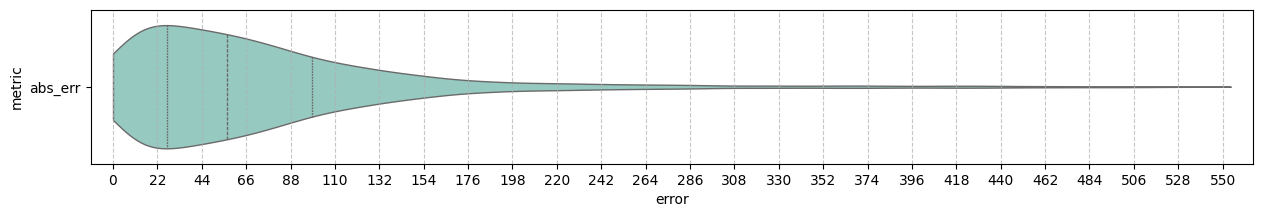

mean        std       min        25%        50%        75%  \
error  76.848166  76.818153  0.006346  26.626551  56.622775  98.874748   

              max  
error  554.049073


Test Score:
272/272 ━━━━━━━━━━━━━━━━━━━━ 17s 62ms/step
mean_squared_error: 0.0033(0.0574) - mean_absolute_error: 0.0411
DeNorm_mean_squared_error: 10631.3350(103.1084) - DeNorm_mean_absolute_error: 73.9074


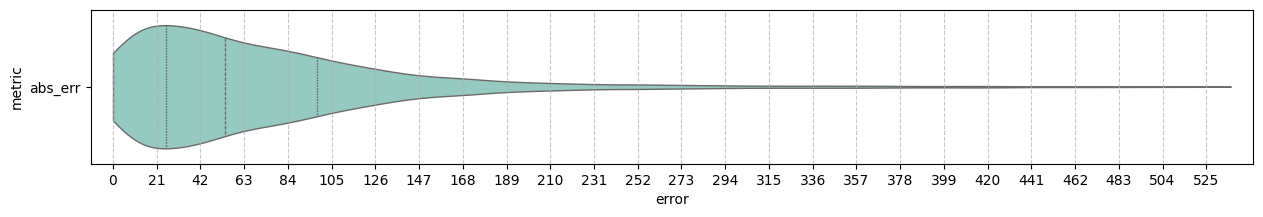

mean        std       min        25%        50%        75%  \
error  73.90744  71.900063  0.005006  25.428981  54.012053  97.817786   

              max  
error  536.797639

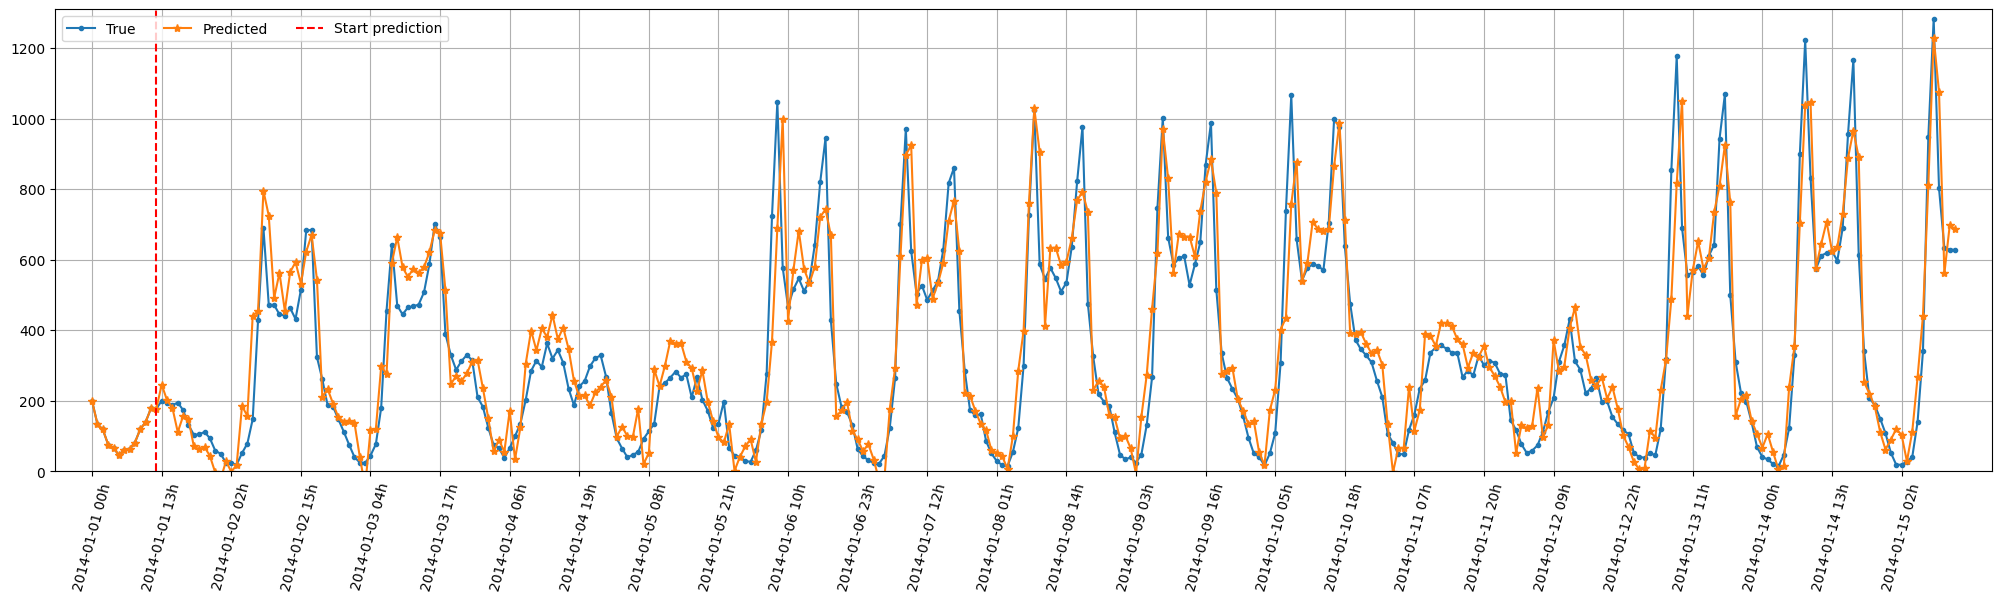

In [ ]:
model_linear = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(trainer.shape_X)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(trainer.shape_y)
])

_ = trainer.fit_on(
    on_model         = model_linear,
    N_epochs         = epochs,
    patience_RLR     = patience_RLR,
    patience_ES      = patience_ES,
    plot_range = plot_range,
    save_model       = sv_model,
    save_step        = sv_step
)

Computing on linear...
-> Training...
-> Validation...
-> Test...
Computing on lstm...
-> Training...
-> Validation...
-> Test...


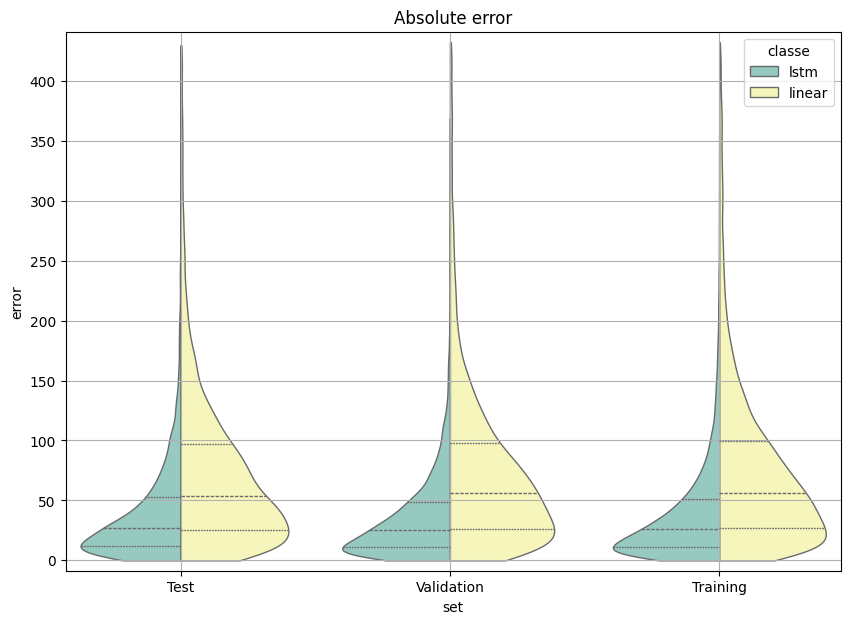

In [ ]:
trainer.violin_plot_compare_model({"linear": model_linear, "lstm": model_lstm}, 800)